In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
df = pd.read_csv('Risk Analytics.csv')

In [327]:
df.head()

,Loan ID,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,1,0,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Core staff,1.0,Religion


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   307511 non-null  int64  
 1   Payment                   307511 non-null  int64  
 2   Loan Type                 307511 non-null  object 
 3   Gender                    307511 non-null  object 
 4   Have a car?               307511 non-null  object 
 5   Have a house              307511 non-null  object 
 6   Number of Children        307511 non-null  int64  
 7   Total Income              307511 non-null  float64
 8   Amount of Credit          307511 non-null  float64
 9   Suite Type                306219 non-null  object 
 10  Income Type               307511 non-null  object 
 11  Education Type            307511 non-null  object 
 12  Family Status             307511 non-null  object 
 13  Have a phone?             307511 non-null  i

In [5]:
df.isna().sum()

Loan ID                         0
Payment                         0
Loan Type                       0
Gender                          0
Have a car?                     0
Have a house                    0
Number of Children              0
Total Income                    0
Amount of Credit                0
Suite Type                   1292
Income Type                     0
Education Type                  0
Family Status                   0
Have a phone?                   0
Have a mail?                    0
Profession                  96391
Number of family members        2
Organization                    0
dtype: int64

In [86]:
df.drop(['Profession'],axis=1,inplace = True)

In [8]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan ID,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
Payment,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
Number of Children,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
Total Income,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
Amount of Credit,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
Have a phone?,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
Have a mail?,307511.0,0.056720,0.231307,0.0,0.0,0.0,0.0,1.0
Number of family members,307509.0,2.152665,0.910682,1.0,2.0,2.0,3.0,20.0


<AxesSubplot:>

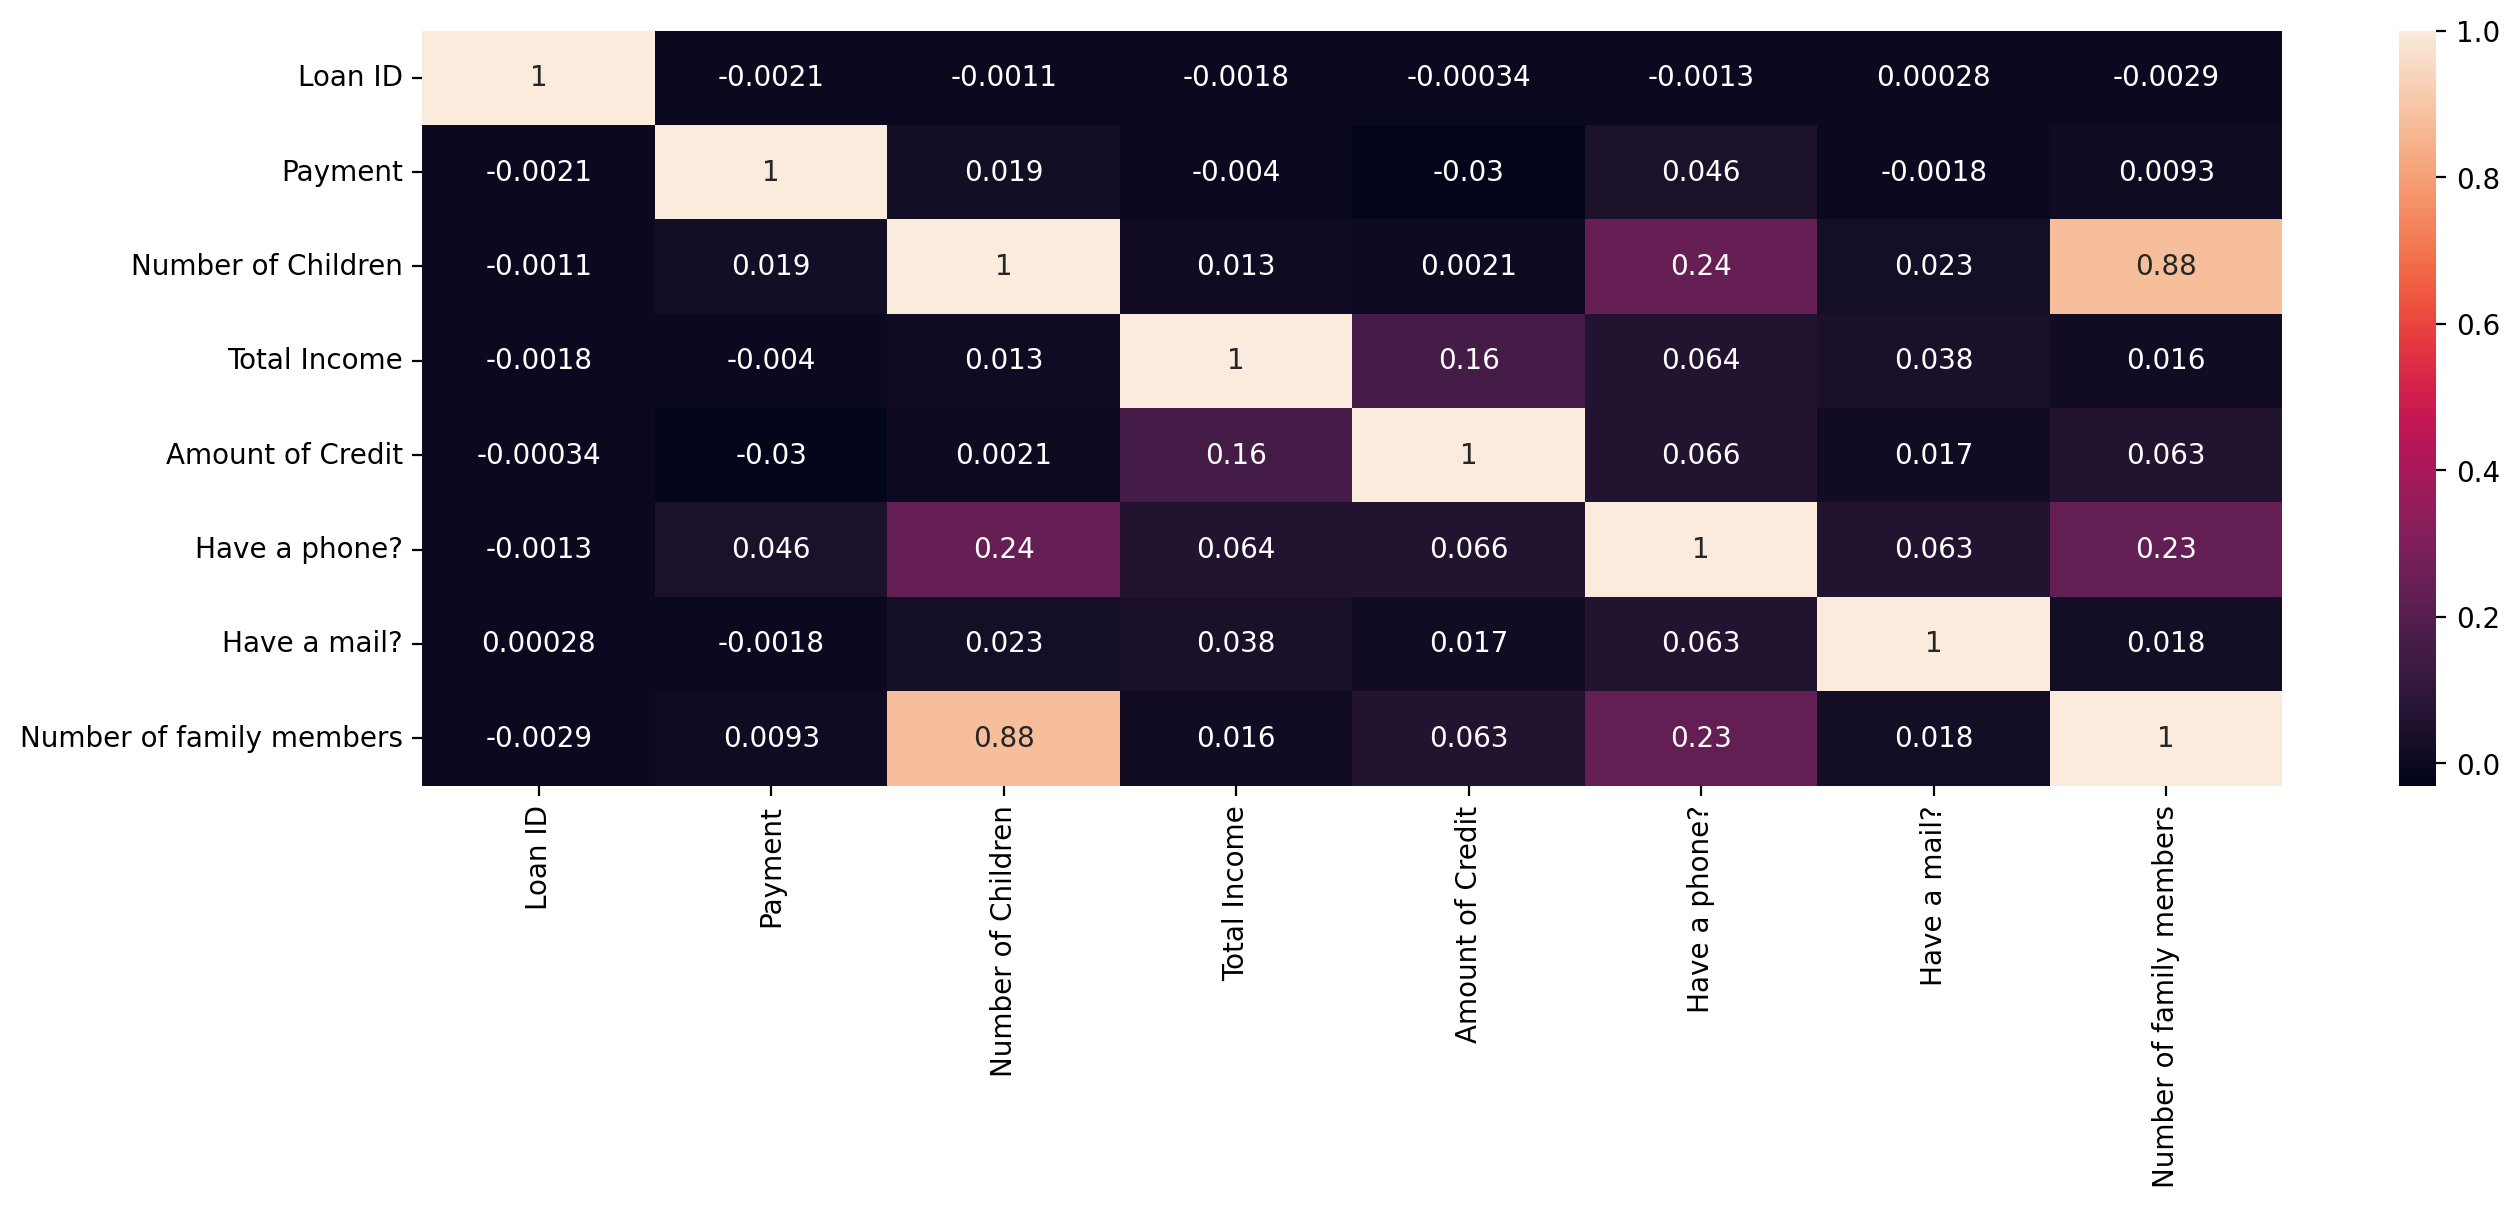

In [11]:
plt.figure(figsize = (15,5),dpi =200)
sns.heatmap(df.corr(),annot = True)

In [ ]:
Non_Defaulters = df[df.Payment == 0]
Defaulters = df[df.Payment == 1]

Text(0.5, 1.0, 'Count of Payment')

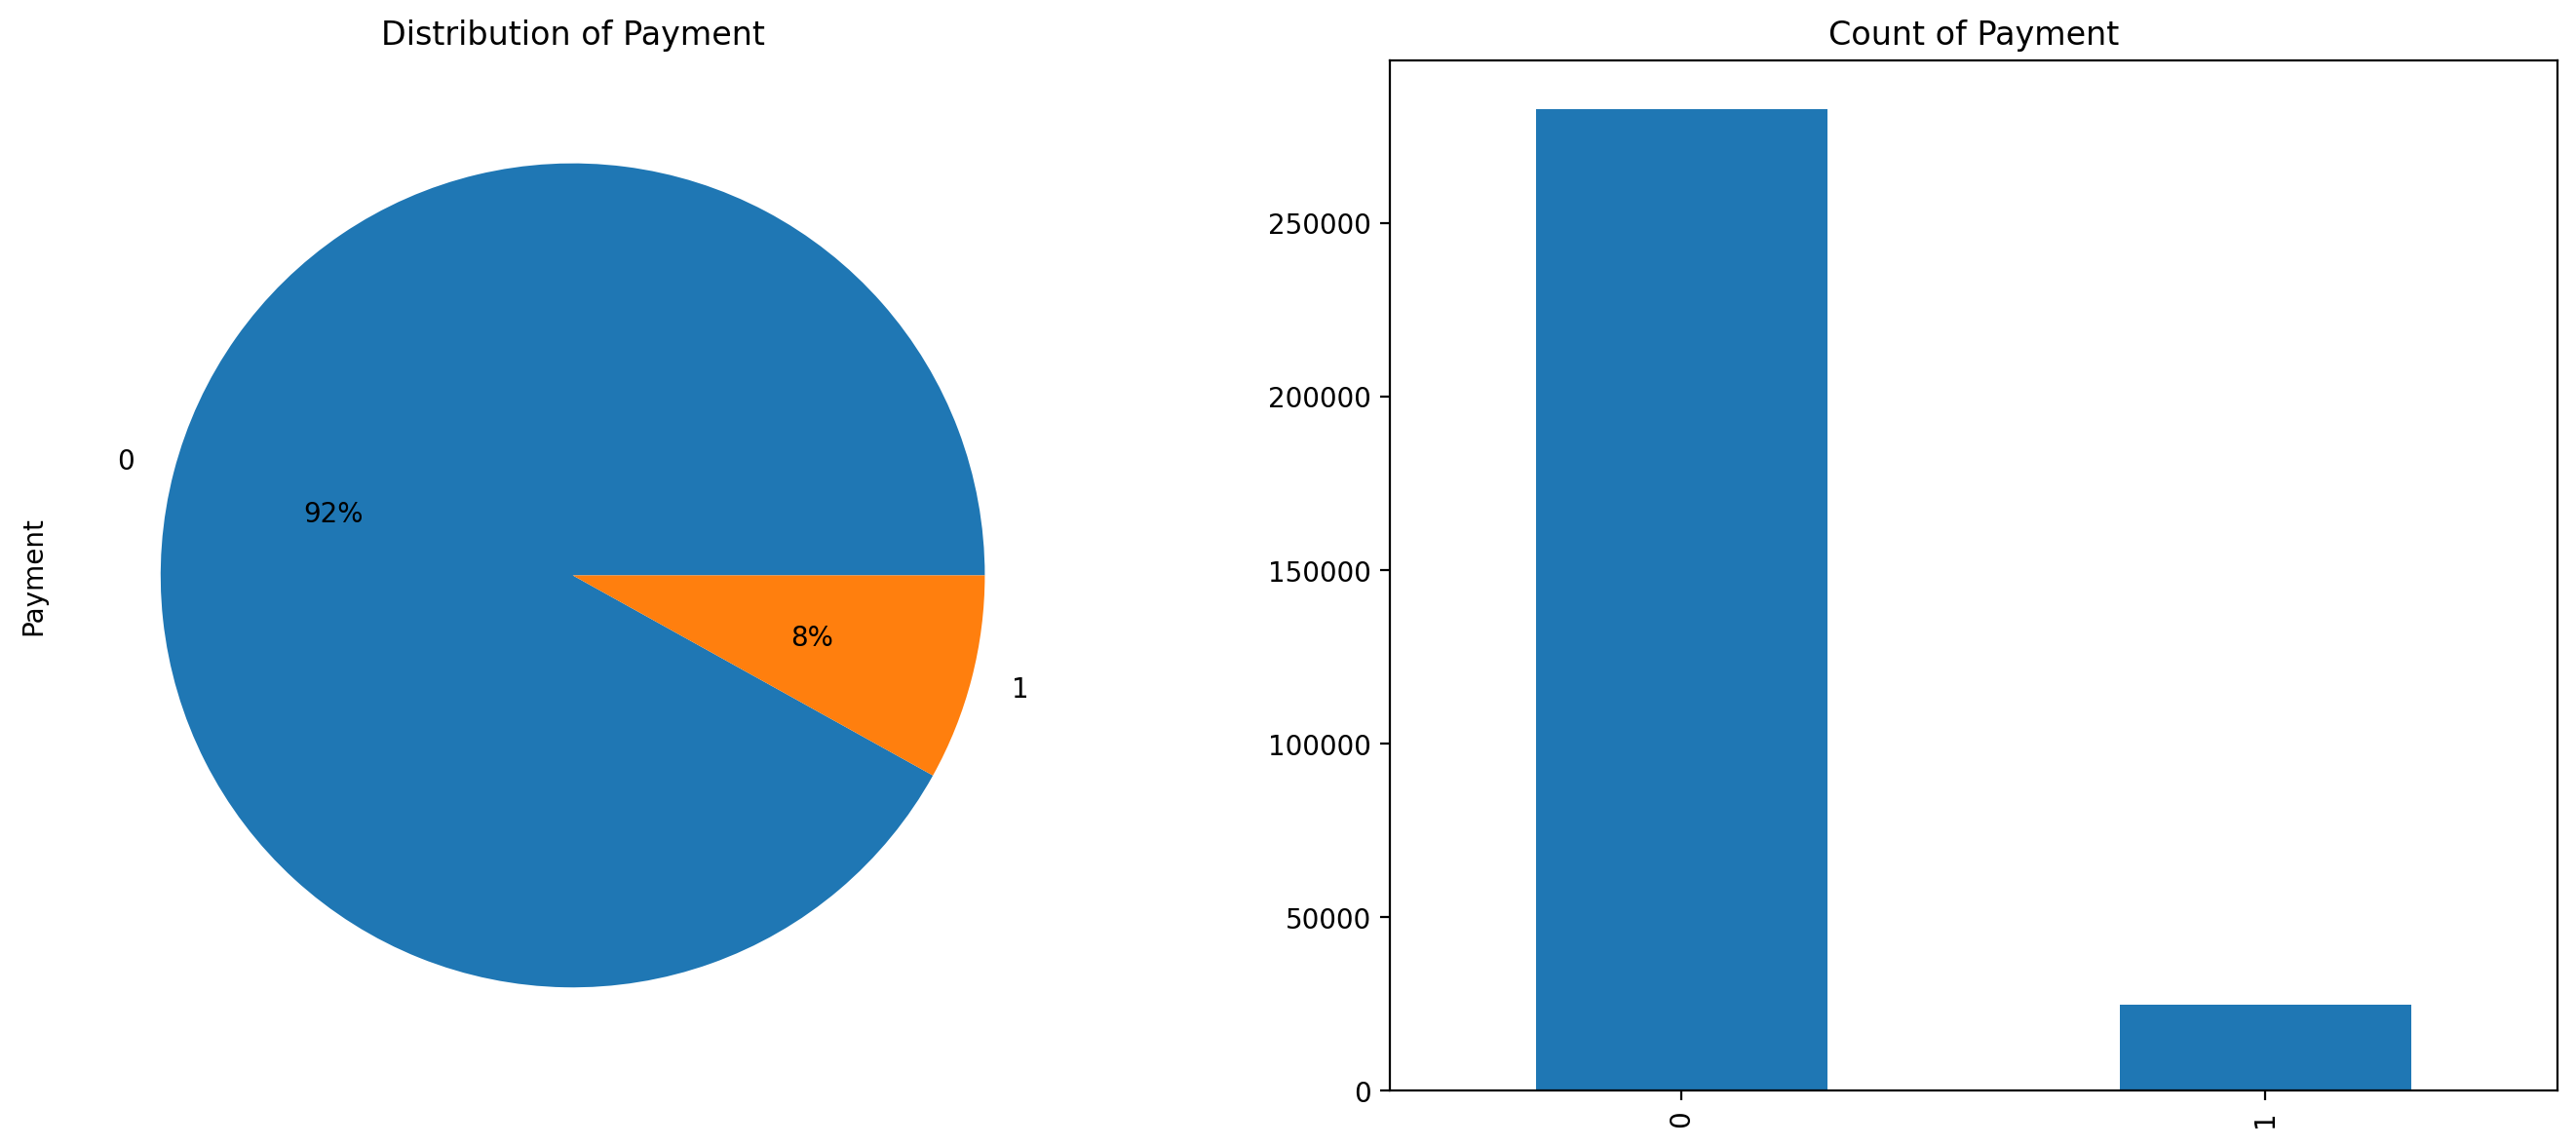

In [115]:
plt.figure(figsize =(17,7),dpi=200)
plt.subplot(121)
df['Payment'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Distribution of Payment')
plt.subplot(122)
df['Payment'].value_counts().plot(kind='bar')
plt.title('Count of Payment')

Text(0.5, 1.0, 'Distribution of gender')

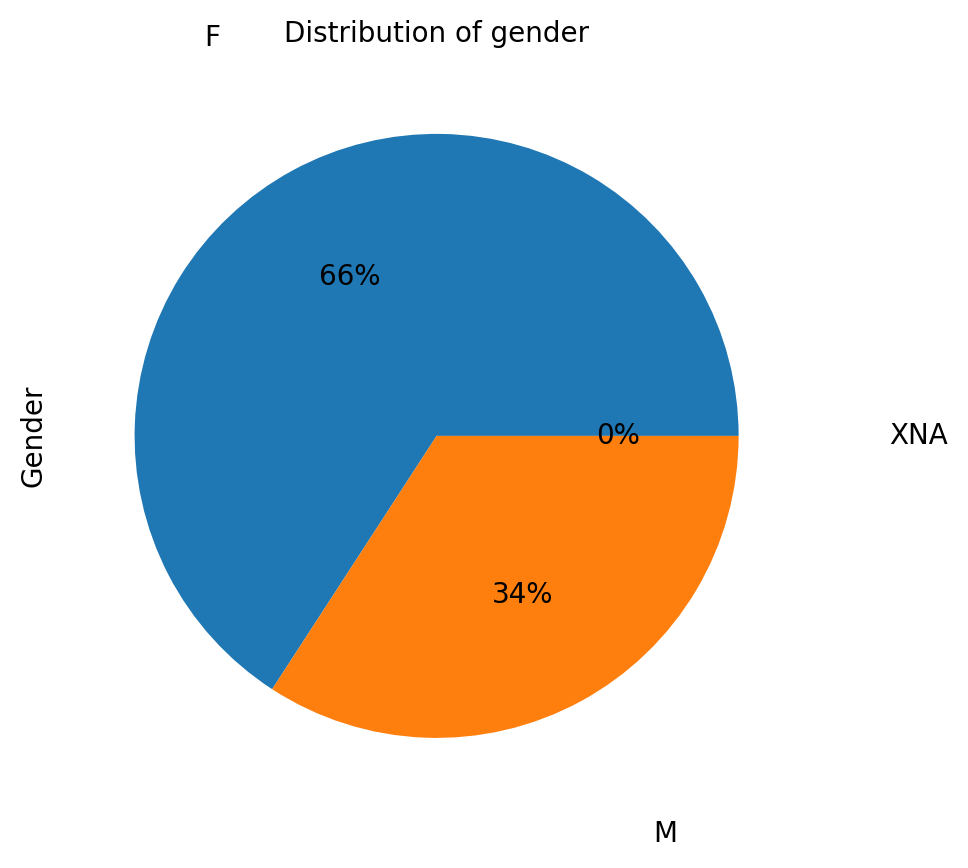

In [382]:
plt.figure(figsize = (20,5),dpi=200)
df['Gender'].value_counts().plot(kind='pie',autopct = "%1.0f%%",labeldistance=1.5)
plt.title('Distribution of gender',fontsize = 10)

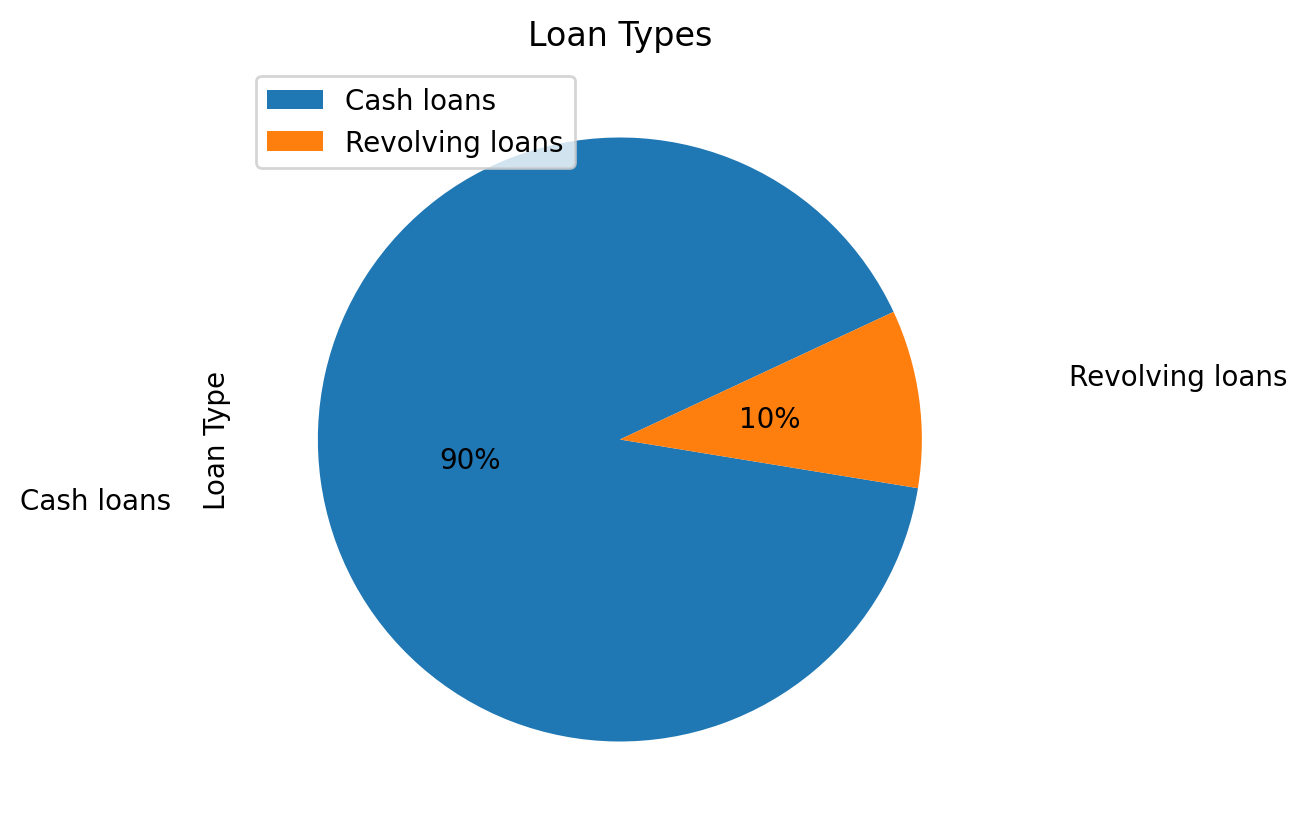

In [164]:
plt.figure(figsize=(20,5),dpi=200)
df['Loan Type'].value_counts().plot(kind='pie',autopct = '%1.0f%%',pctdistance=0.5,startangle = 25,labeldistance = 1.5)
plt.title('Loan Types')
plt.legend(loc='upper left')

<AxesSubplot:xlabel='Gender', ylabel='count'>

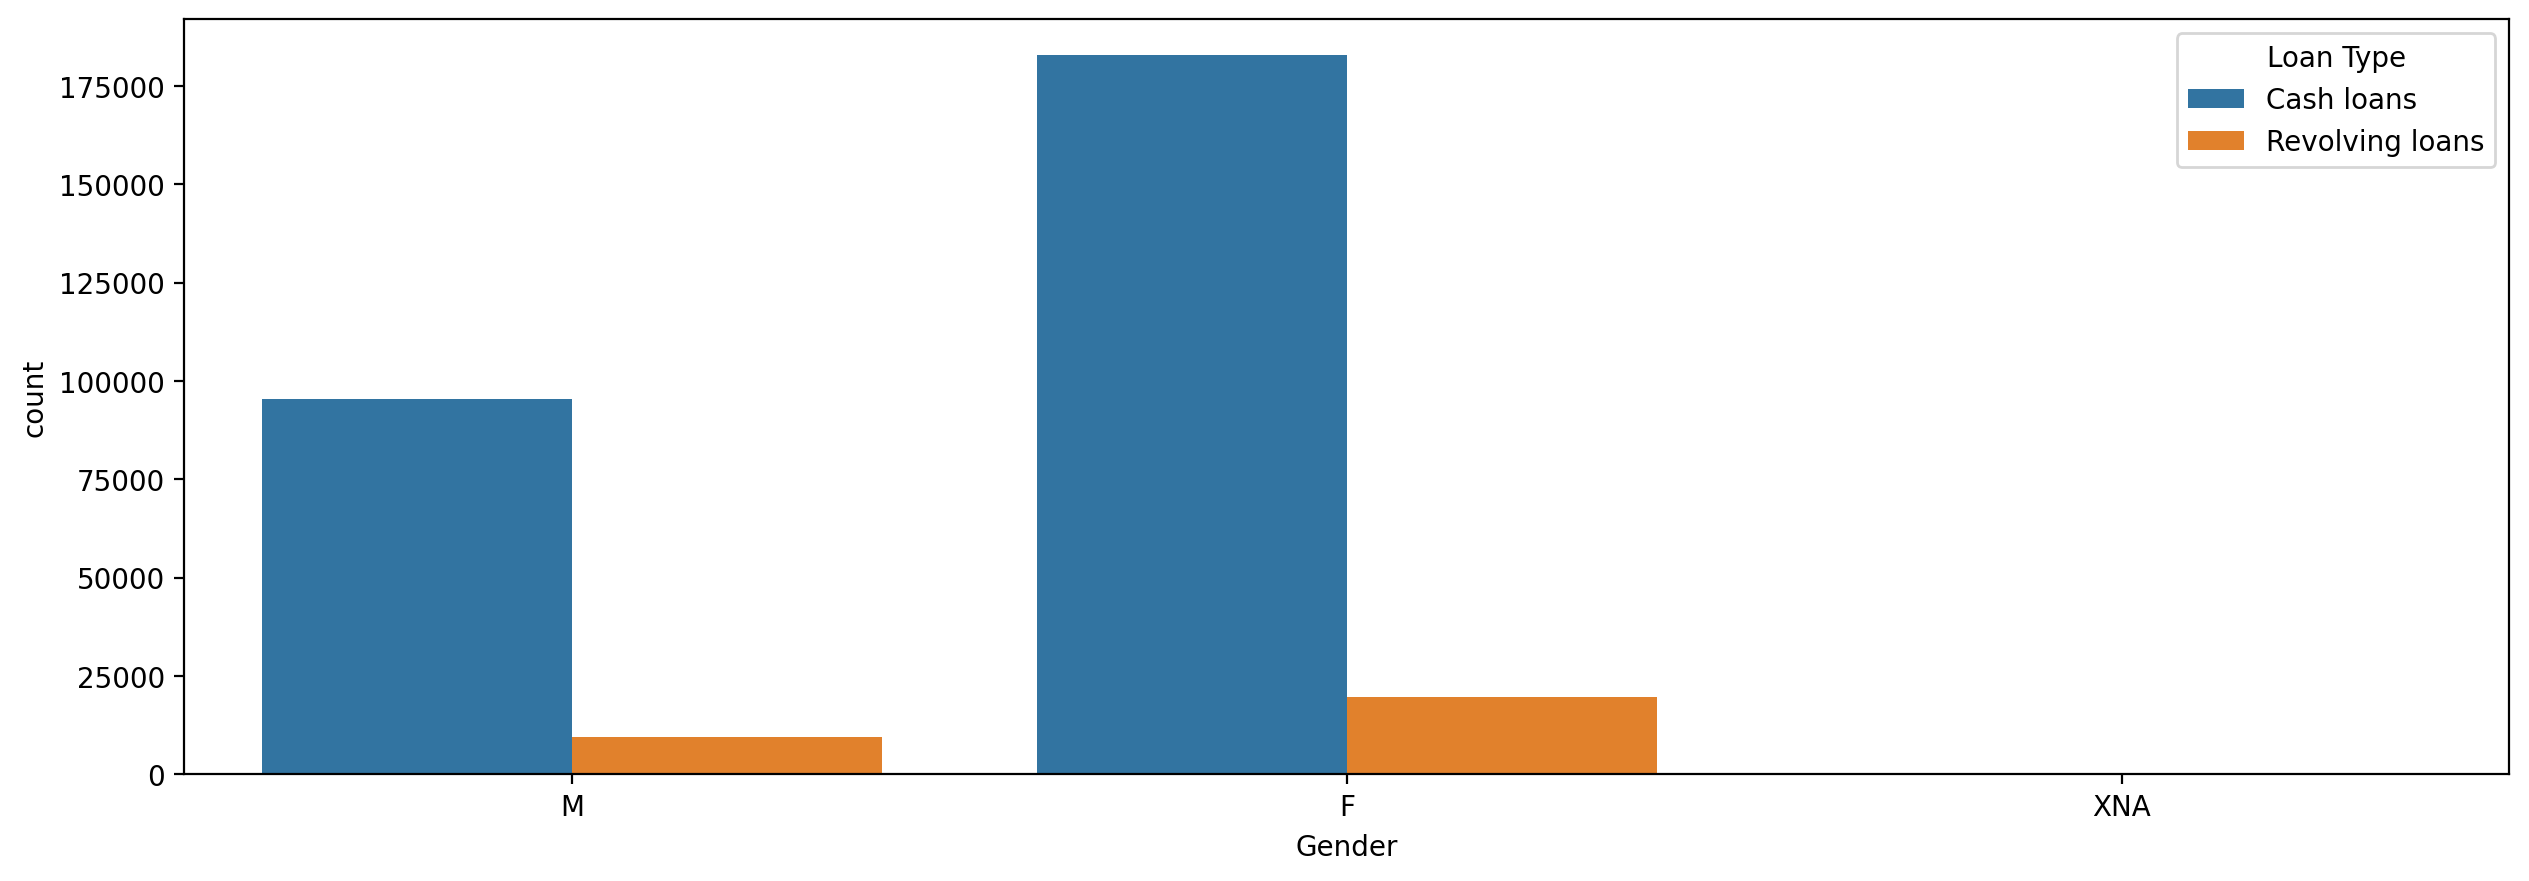

In [166]:
plt.figure(figsize=(15,5),dpi=200)
sns.countplot(data=df,x=df['Gender'],hue = df['Loan Type'])

##### Cash loans prefered over Revolving loans by both genders

In [299]:
columns = ['Loan Type','Gender','Income Type','Education Type','Family Status']

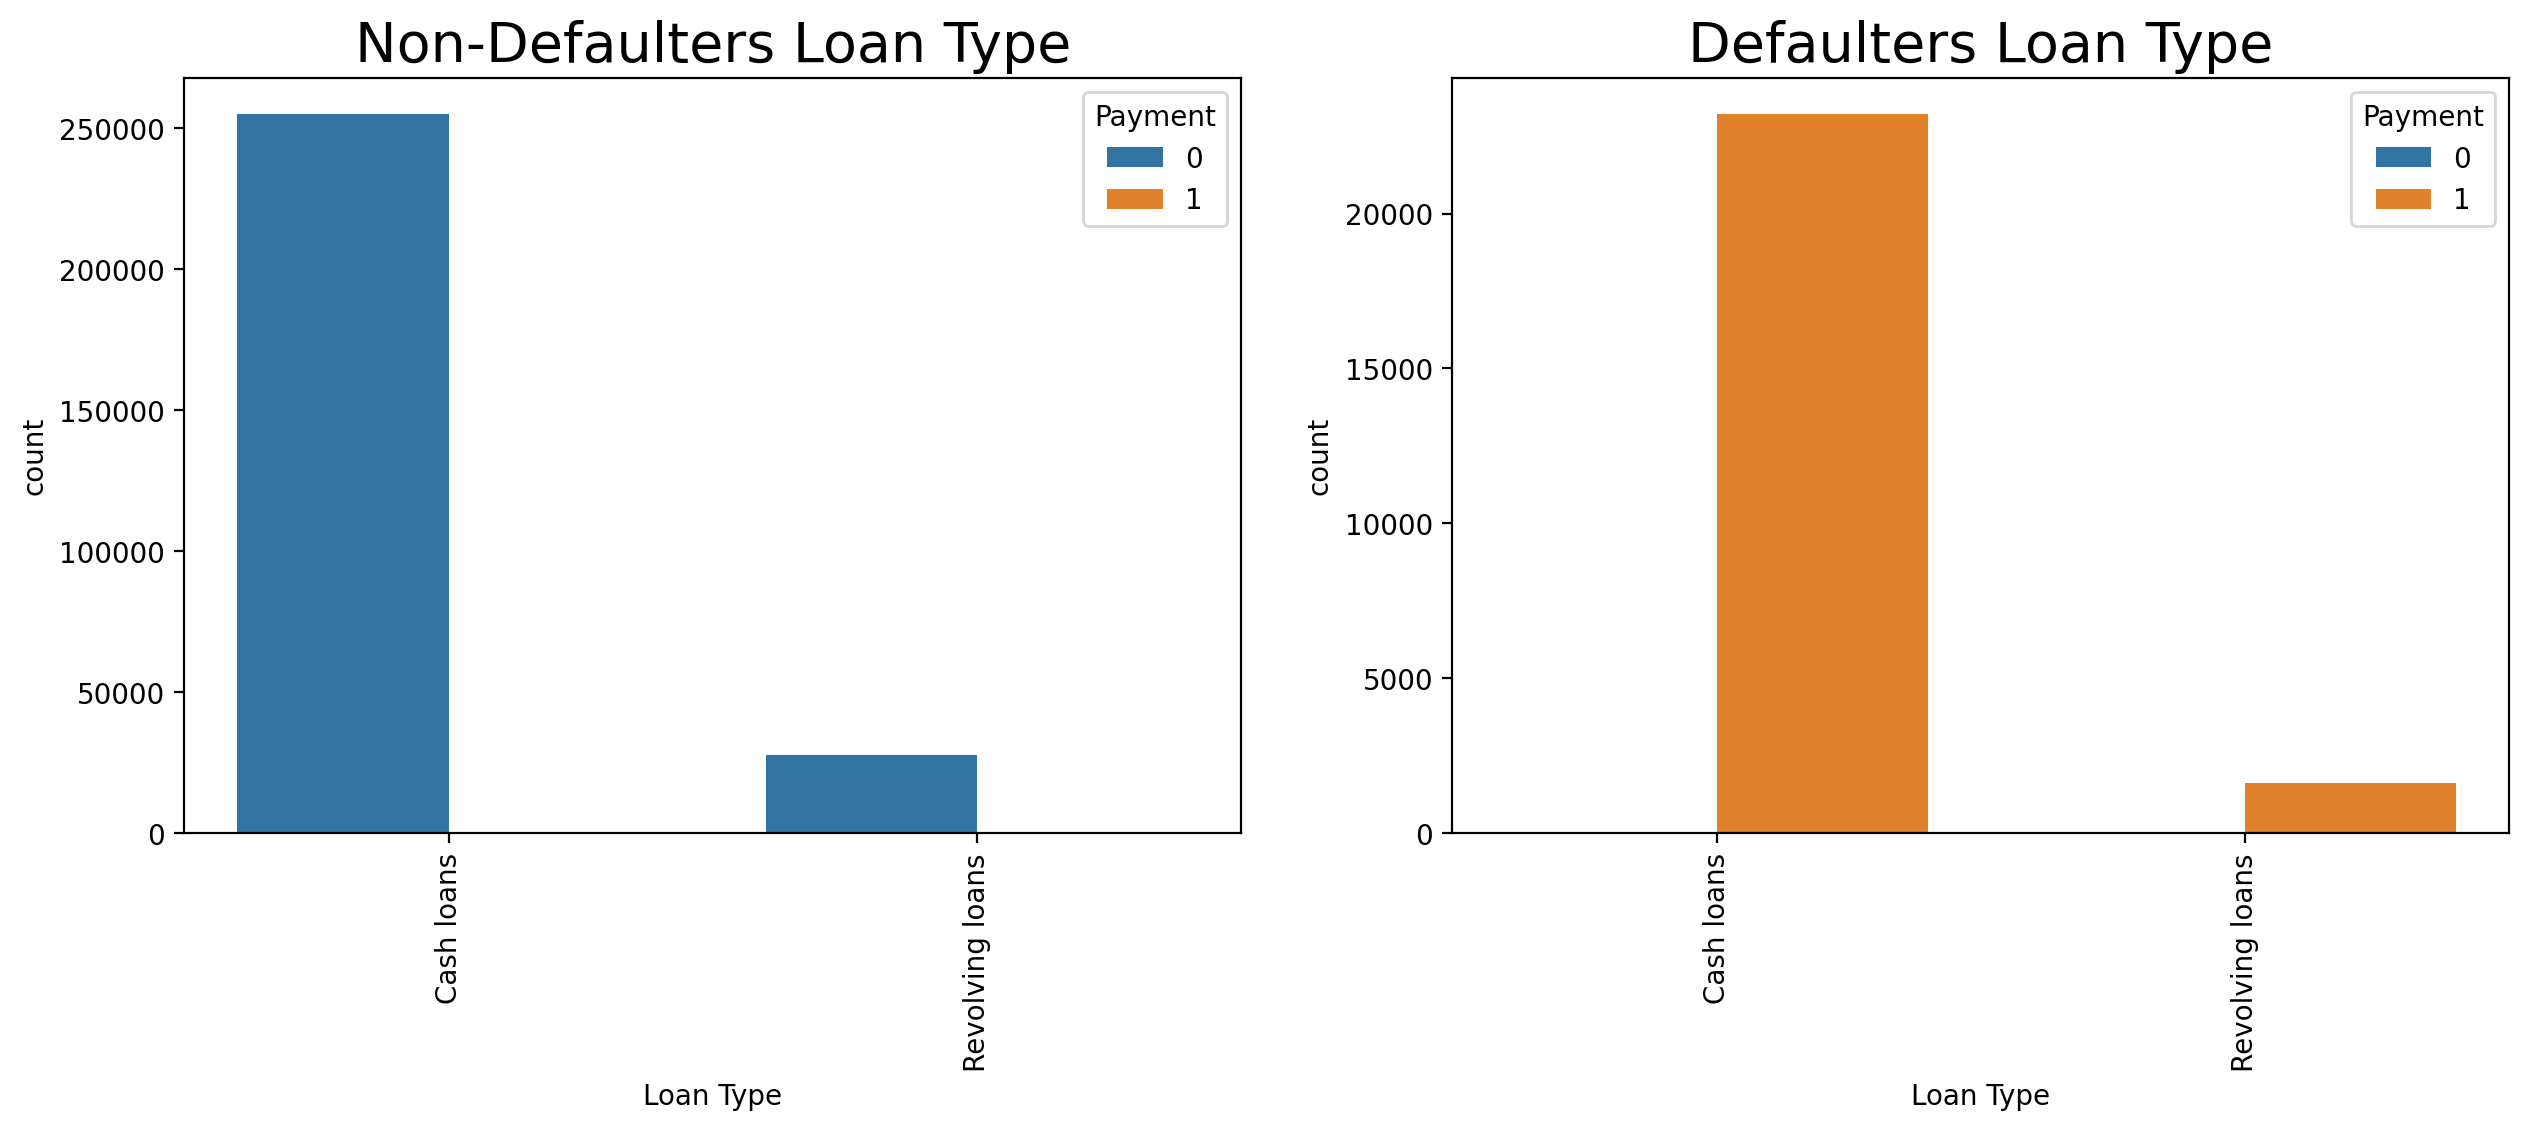

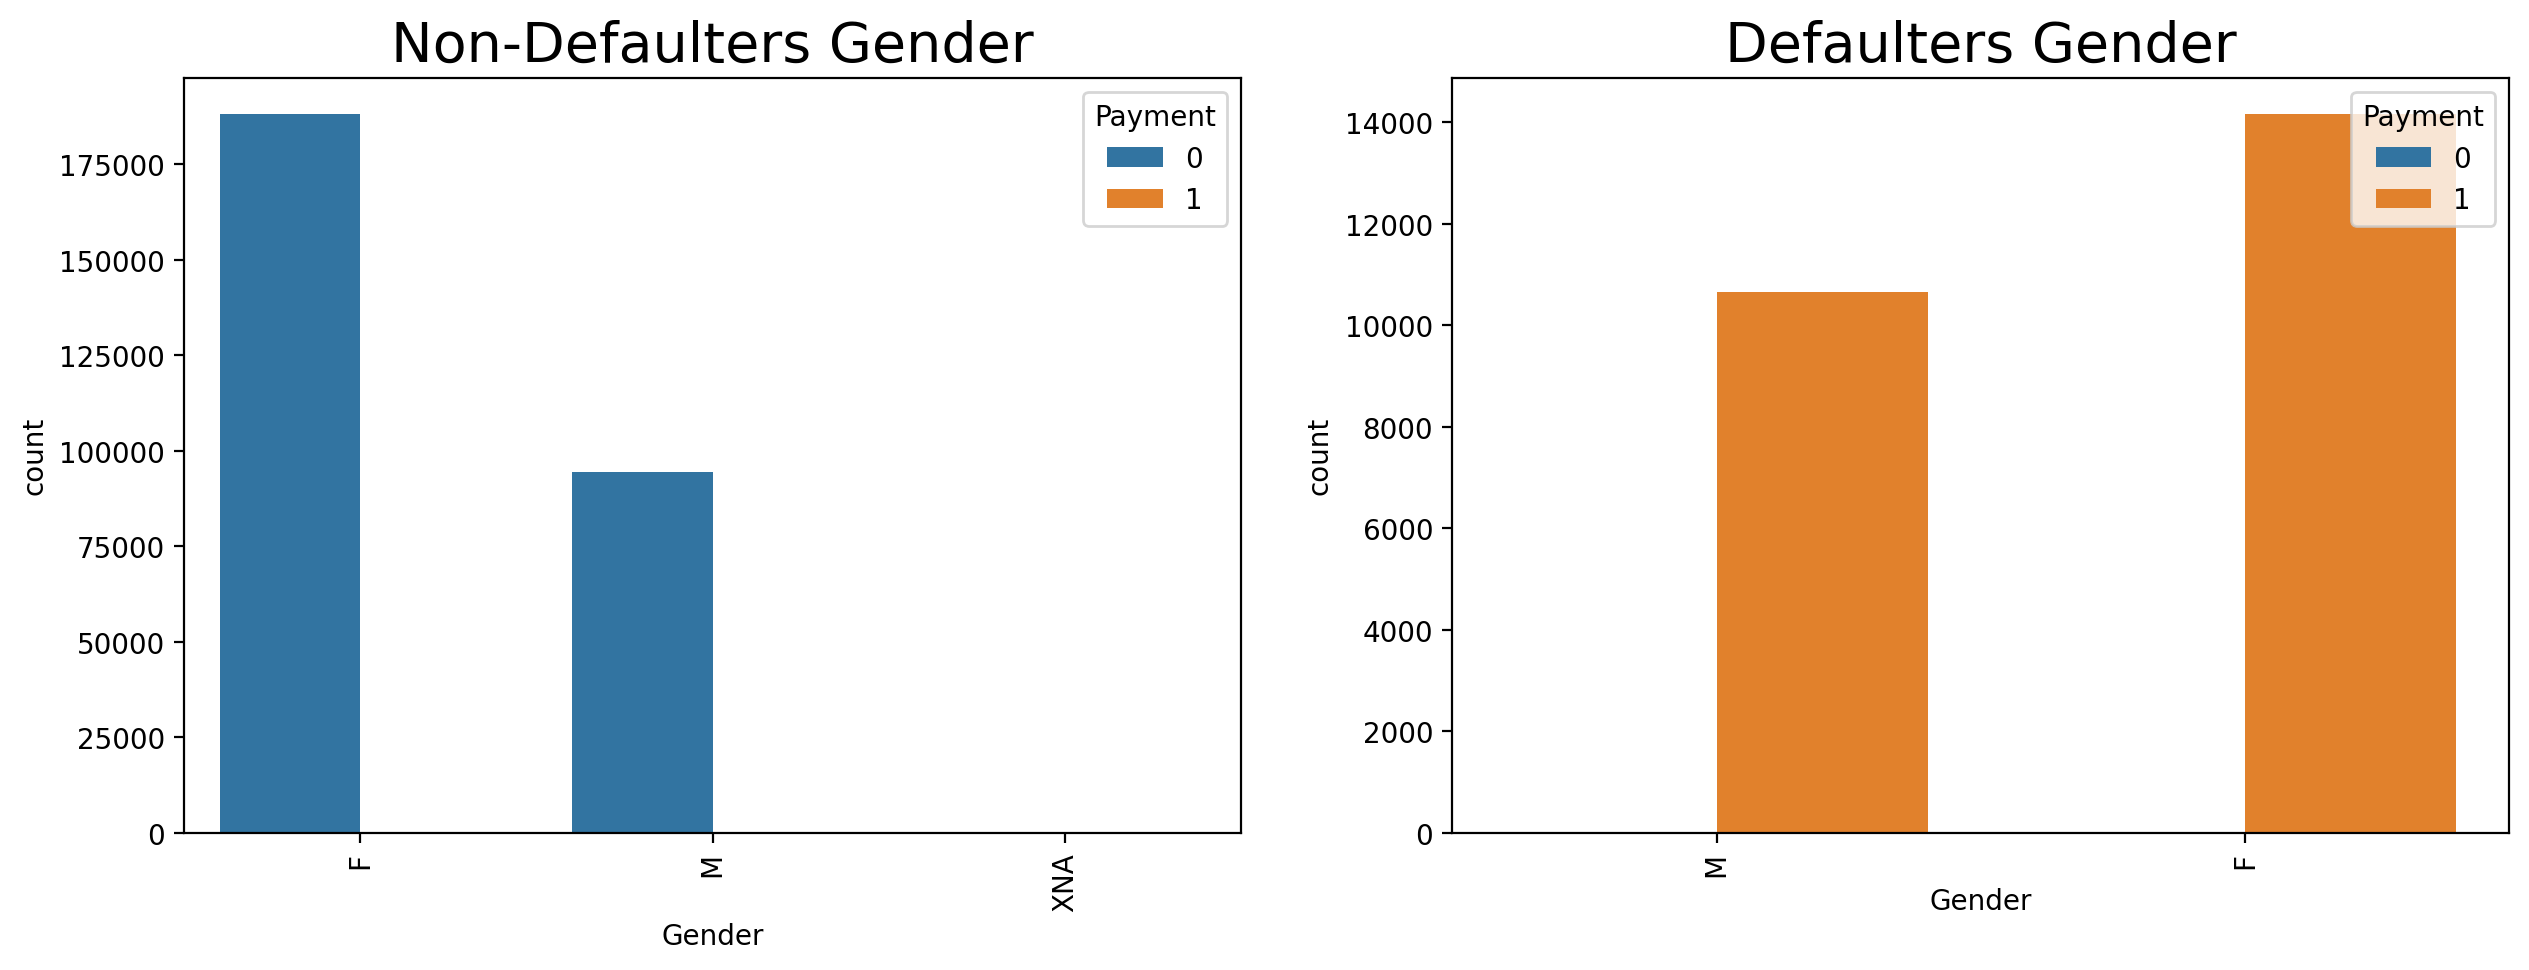

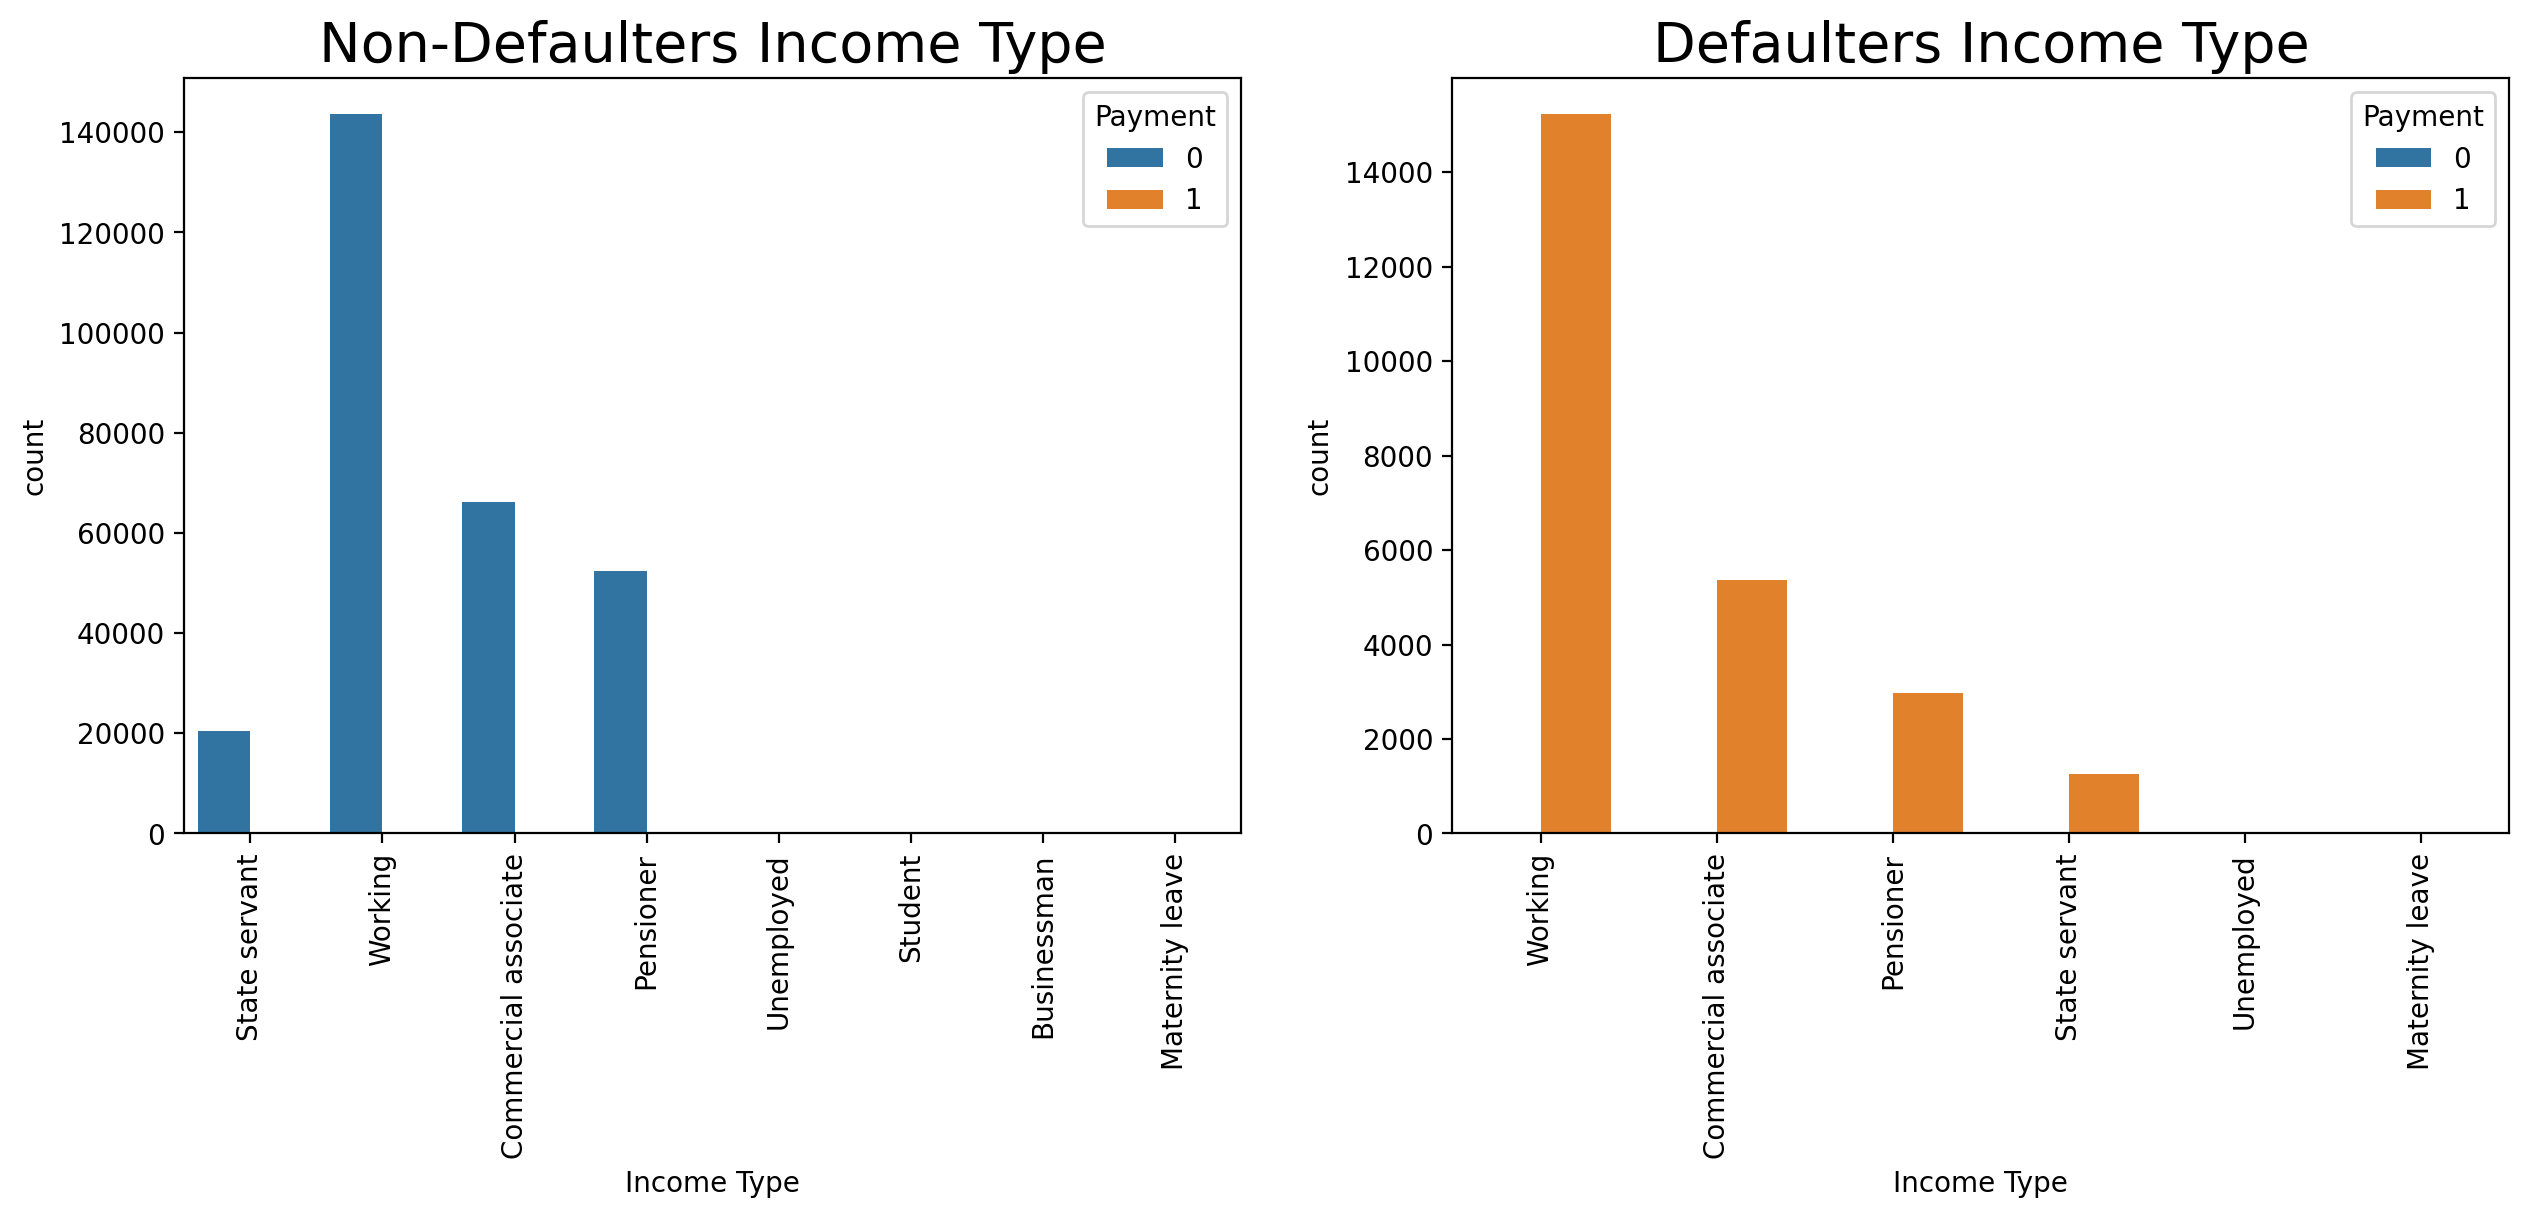

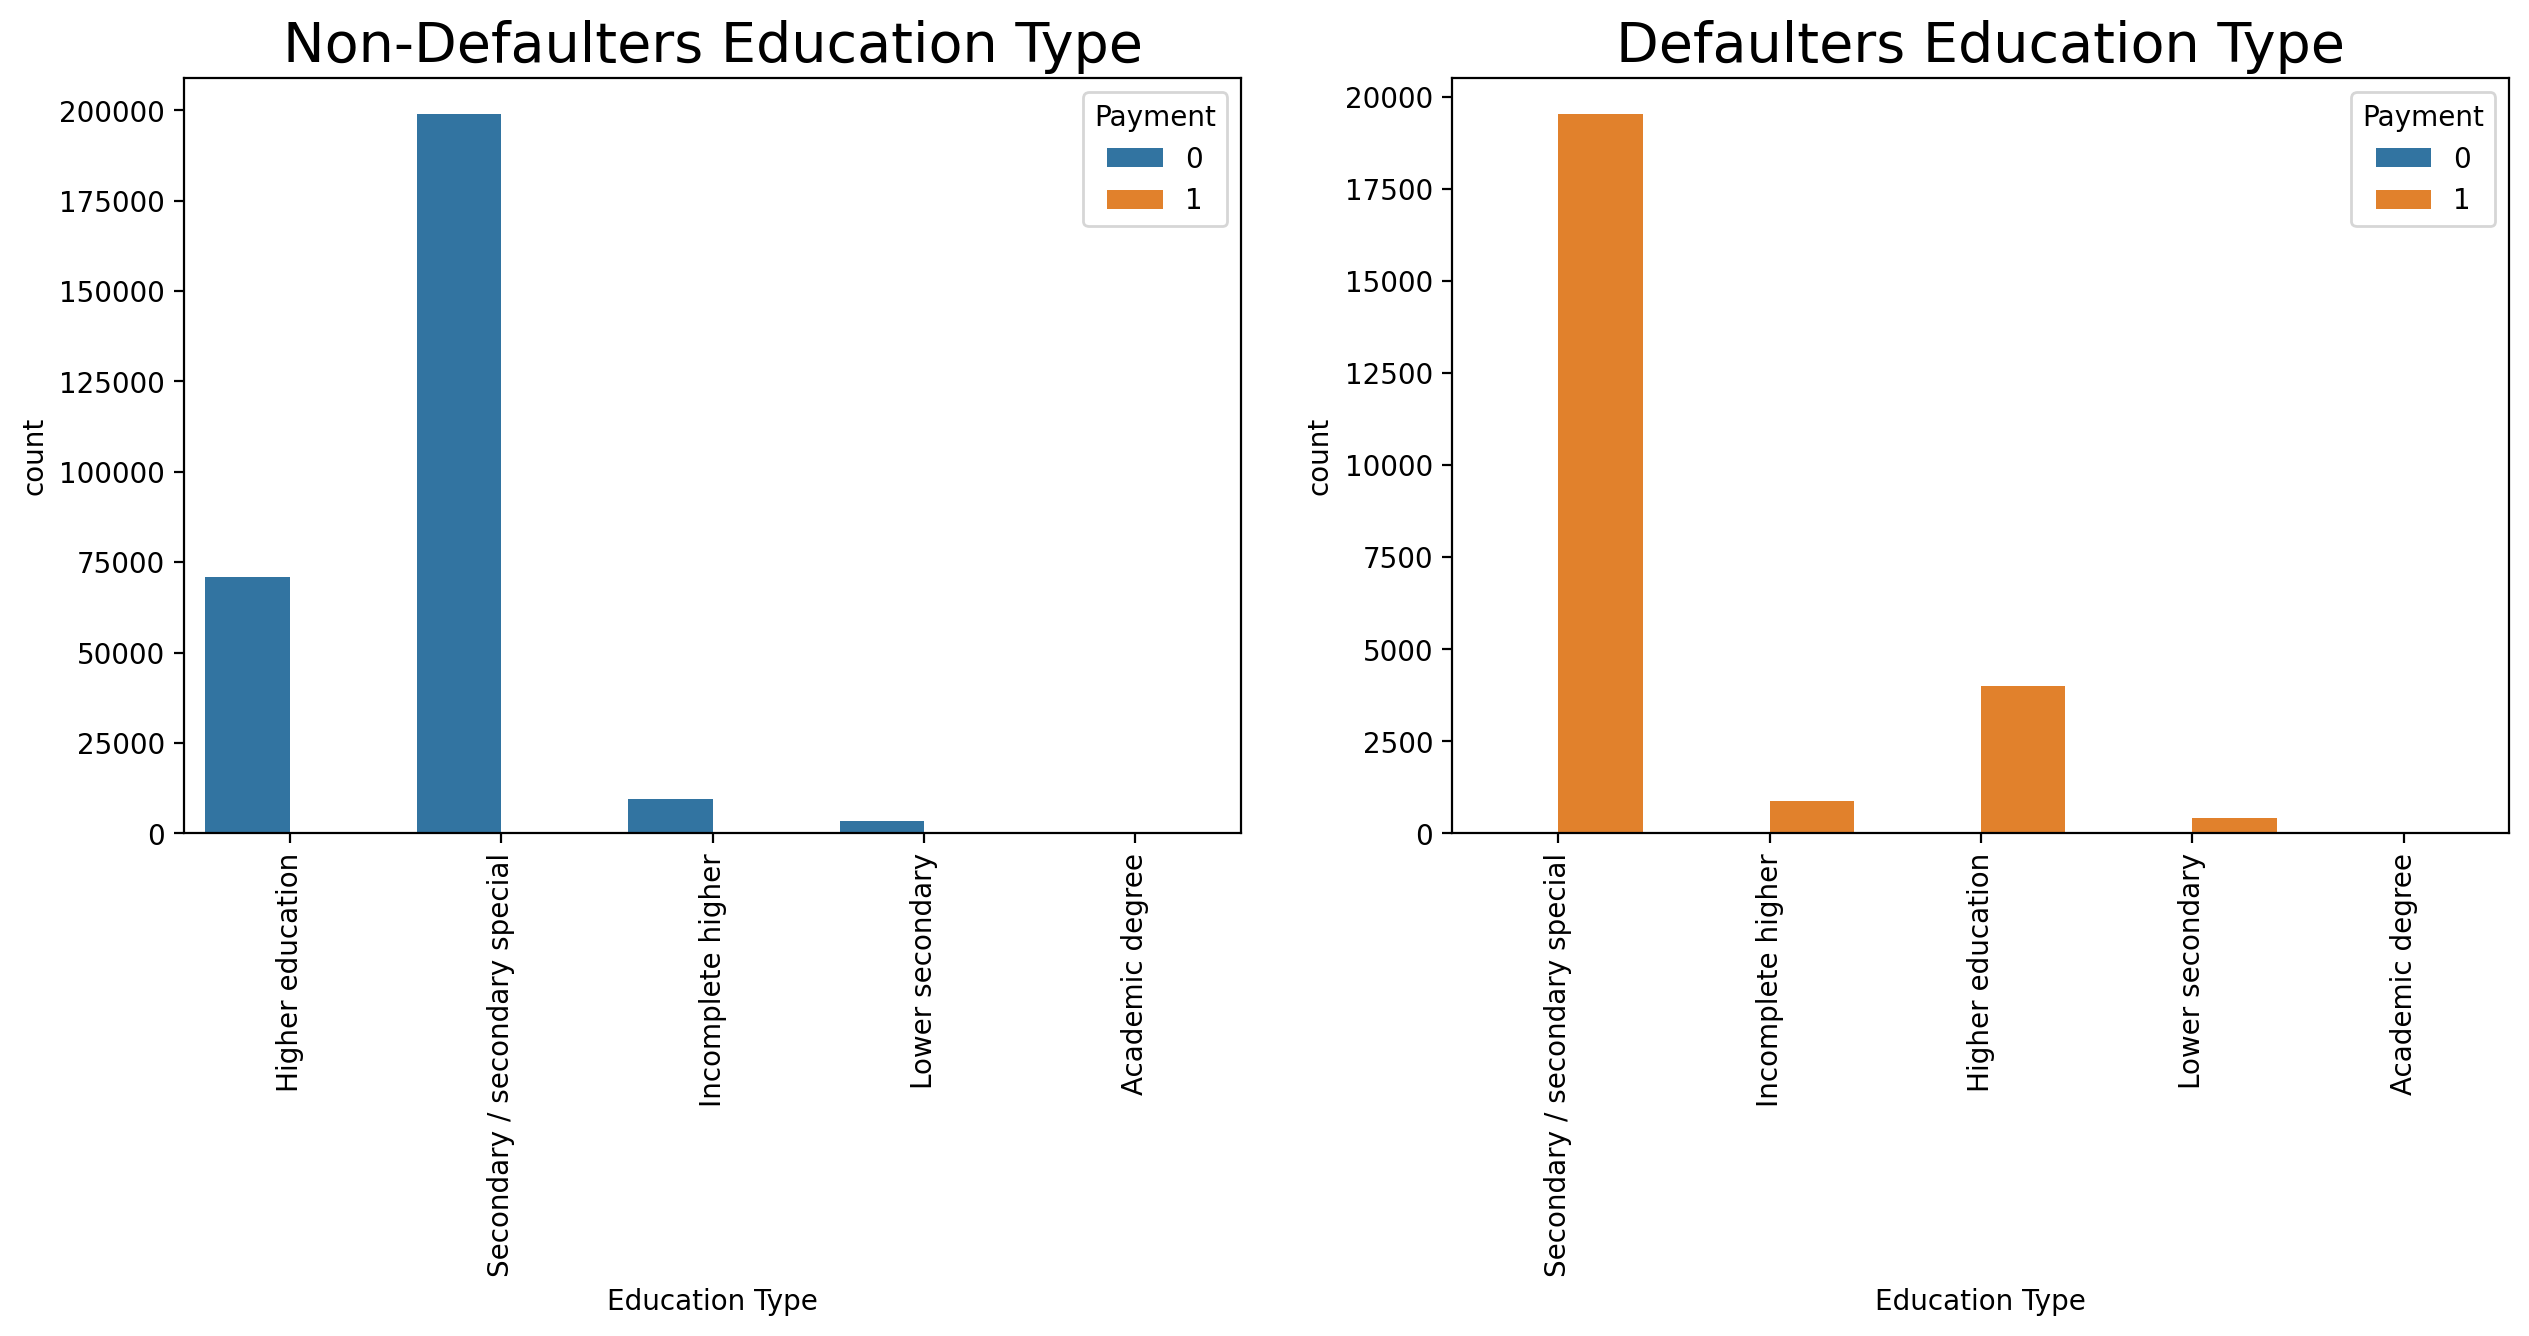

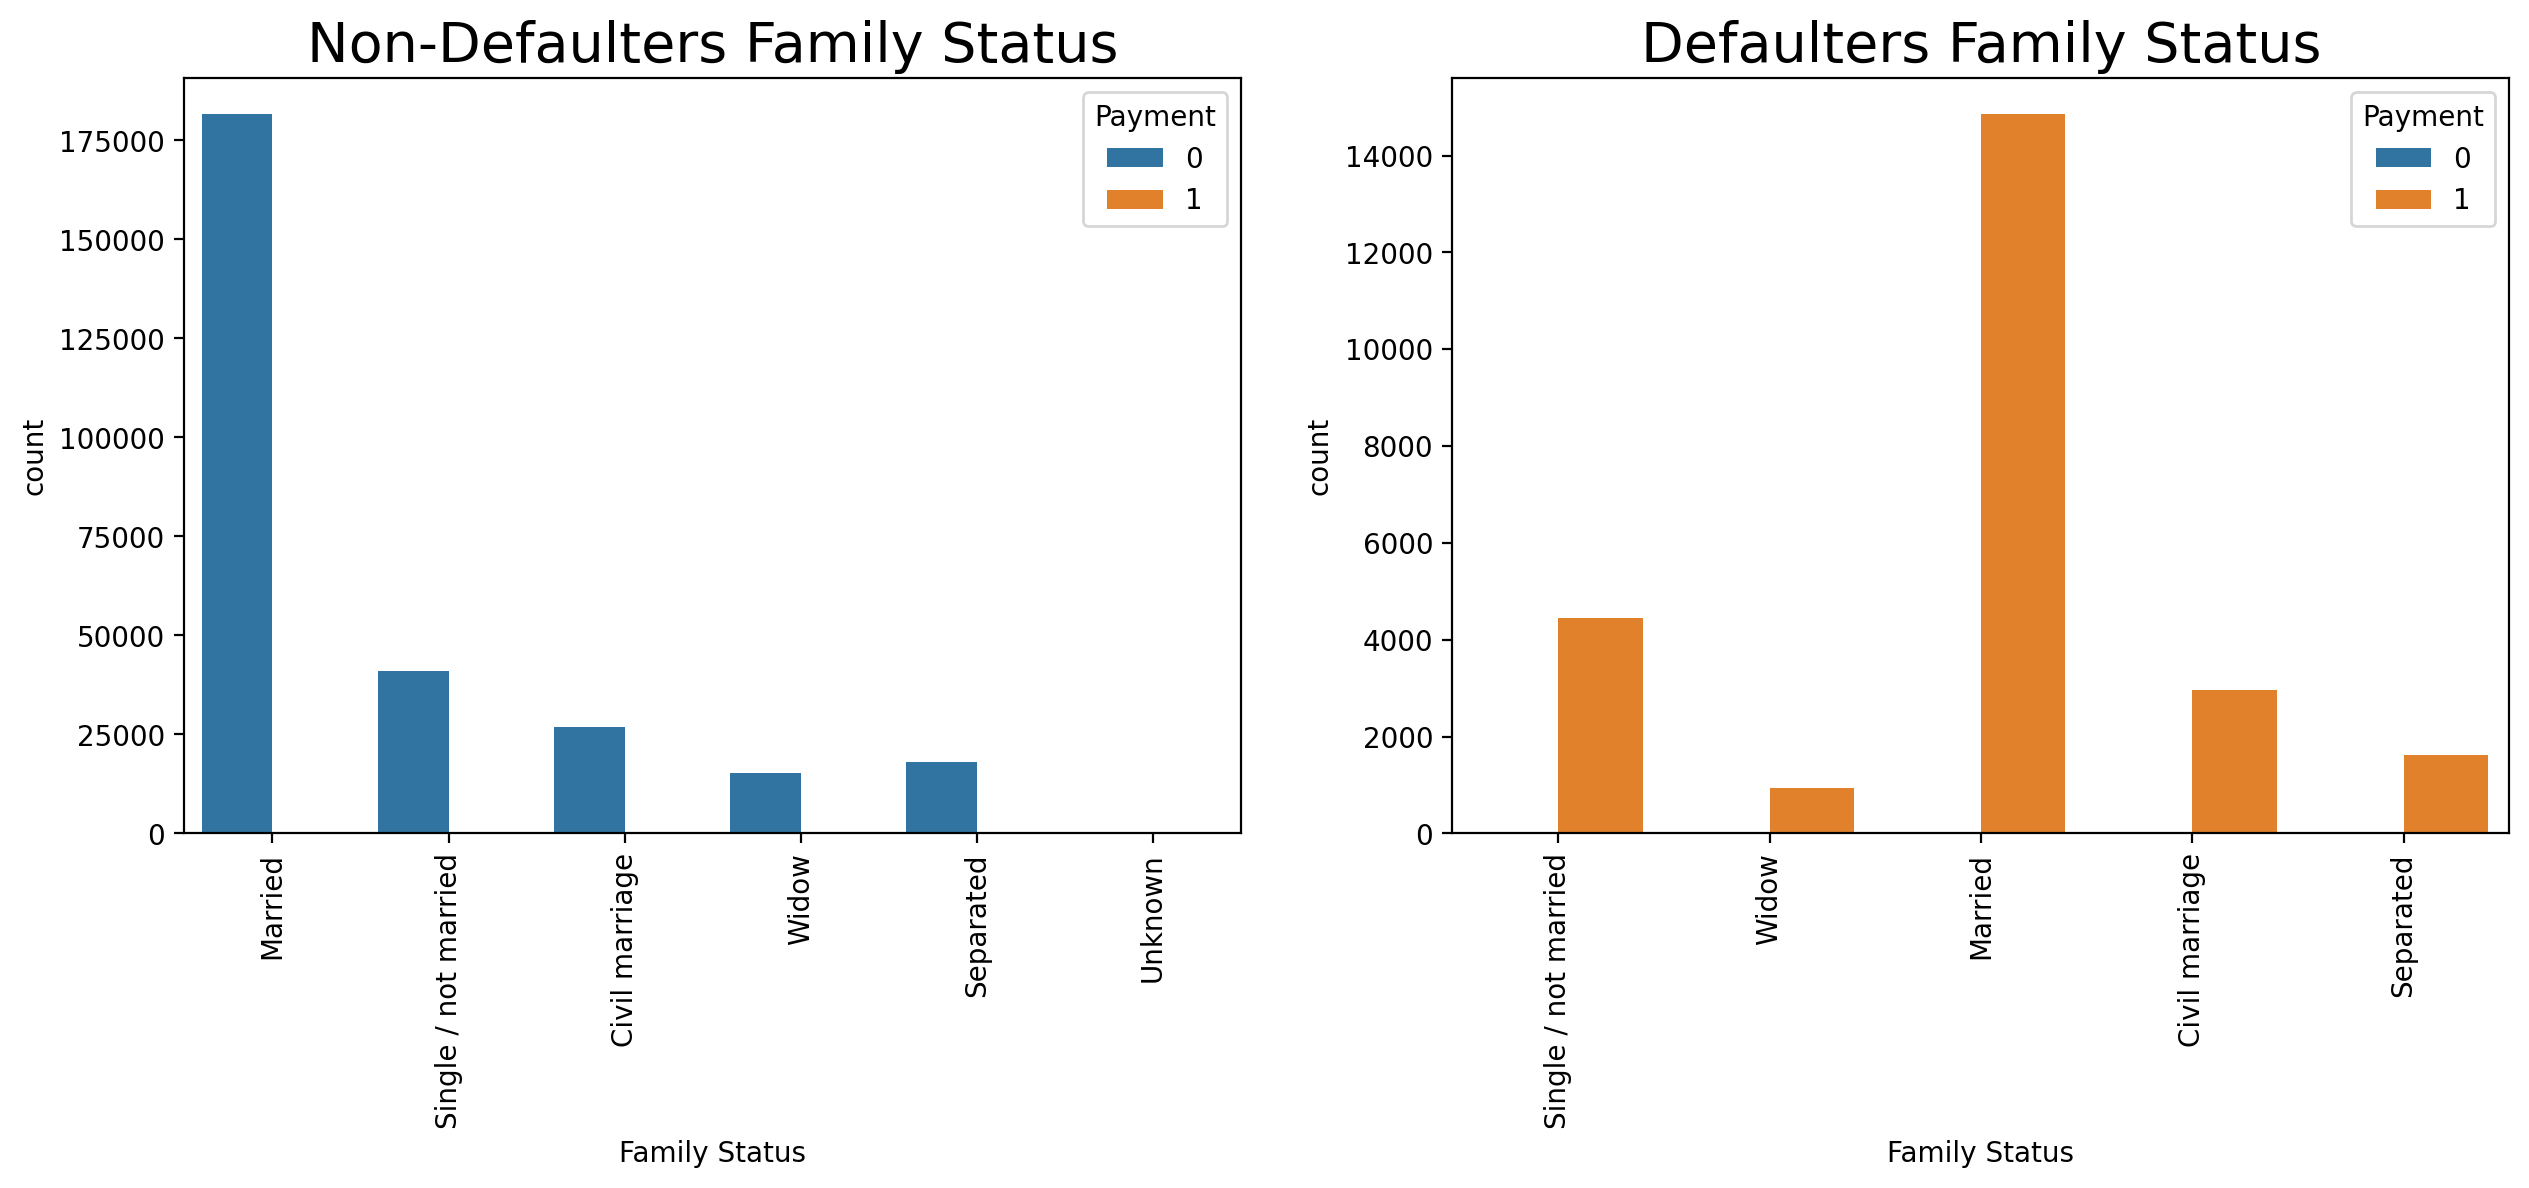

In [502]:
for i,col in enumerate(columns):
    plt.figure(i,figsize=(15,5),dpi=200)
    plt.subplot(121)
    sns.countplot(hue=df['Payment'],x=Non_Defaulters[col],data=df)
    plt.title('Non-Defaulters '+col,fontsize=20)
    plt.xticks(rotation=90)
    plt.subplot(122)
    sns.countplot(hue=df['Payment'],x=Defaulters[col],data=df)
    plt.title('Defaulters '+col,fontsize=20)
    plt.xticks(rotation=90)

Text(0.5, 1.0, 'Total Income')

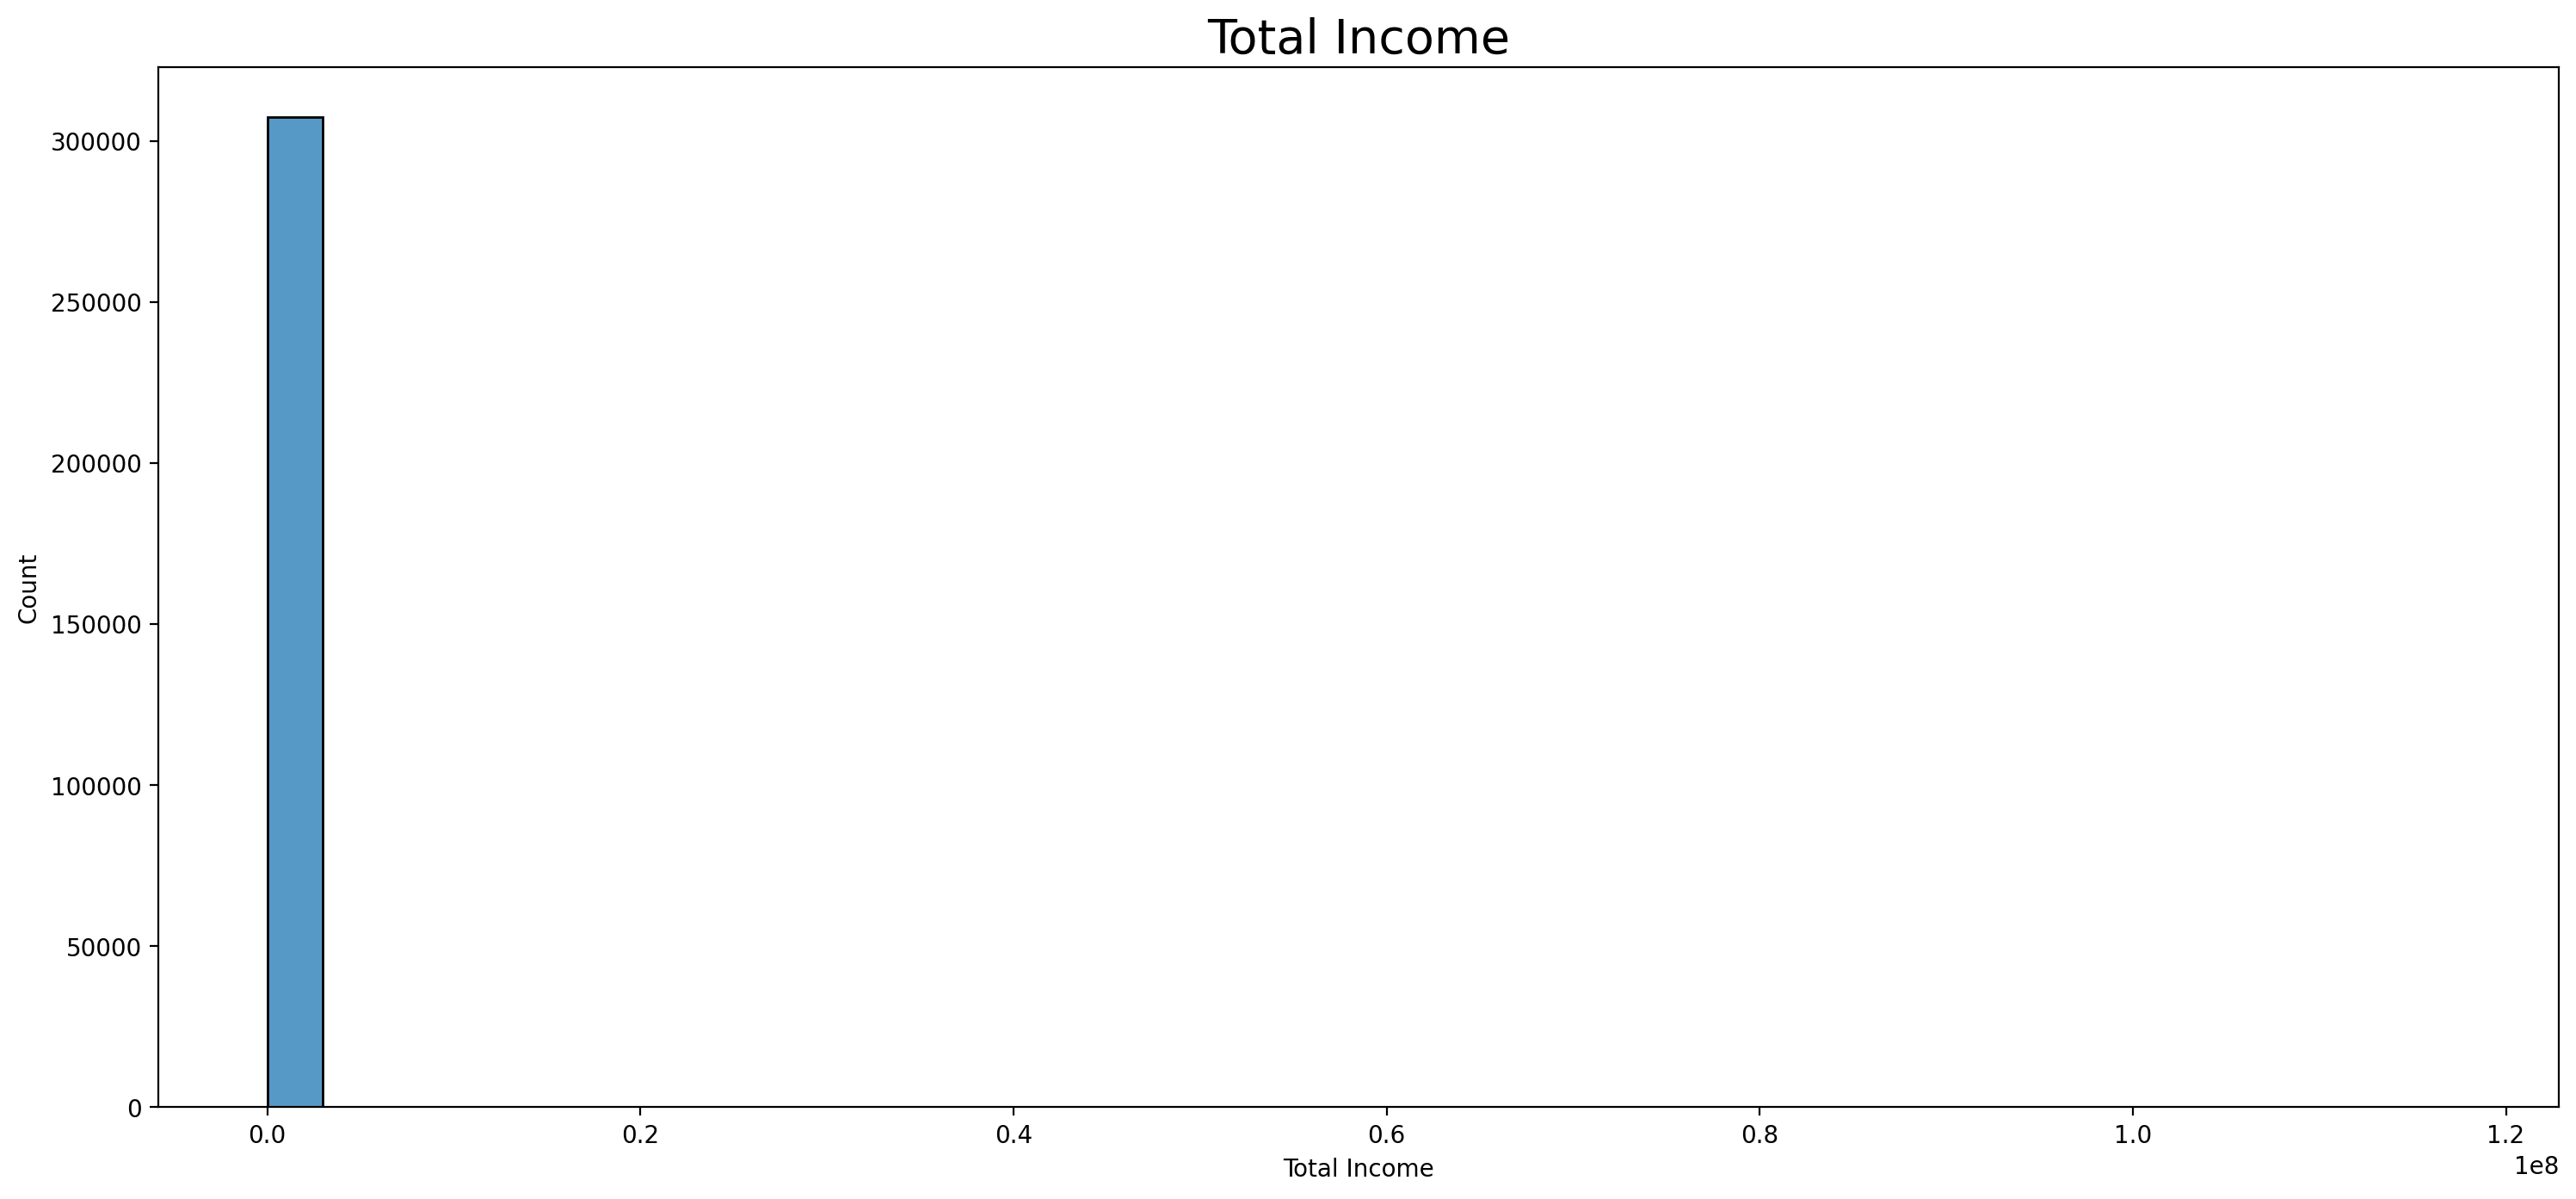

In [385]:
plt.figure(figsize=(18,8),dpi=200)
sns.histplot(df['Total Income'],bins=40)
plt.title('Total Income',fontsize=20)

/Users/sanan33/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


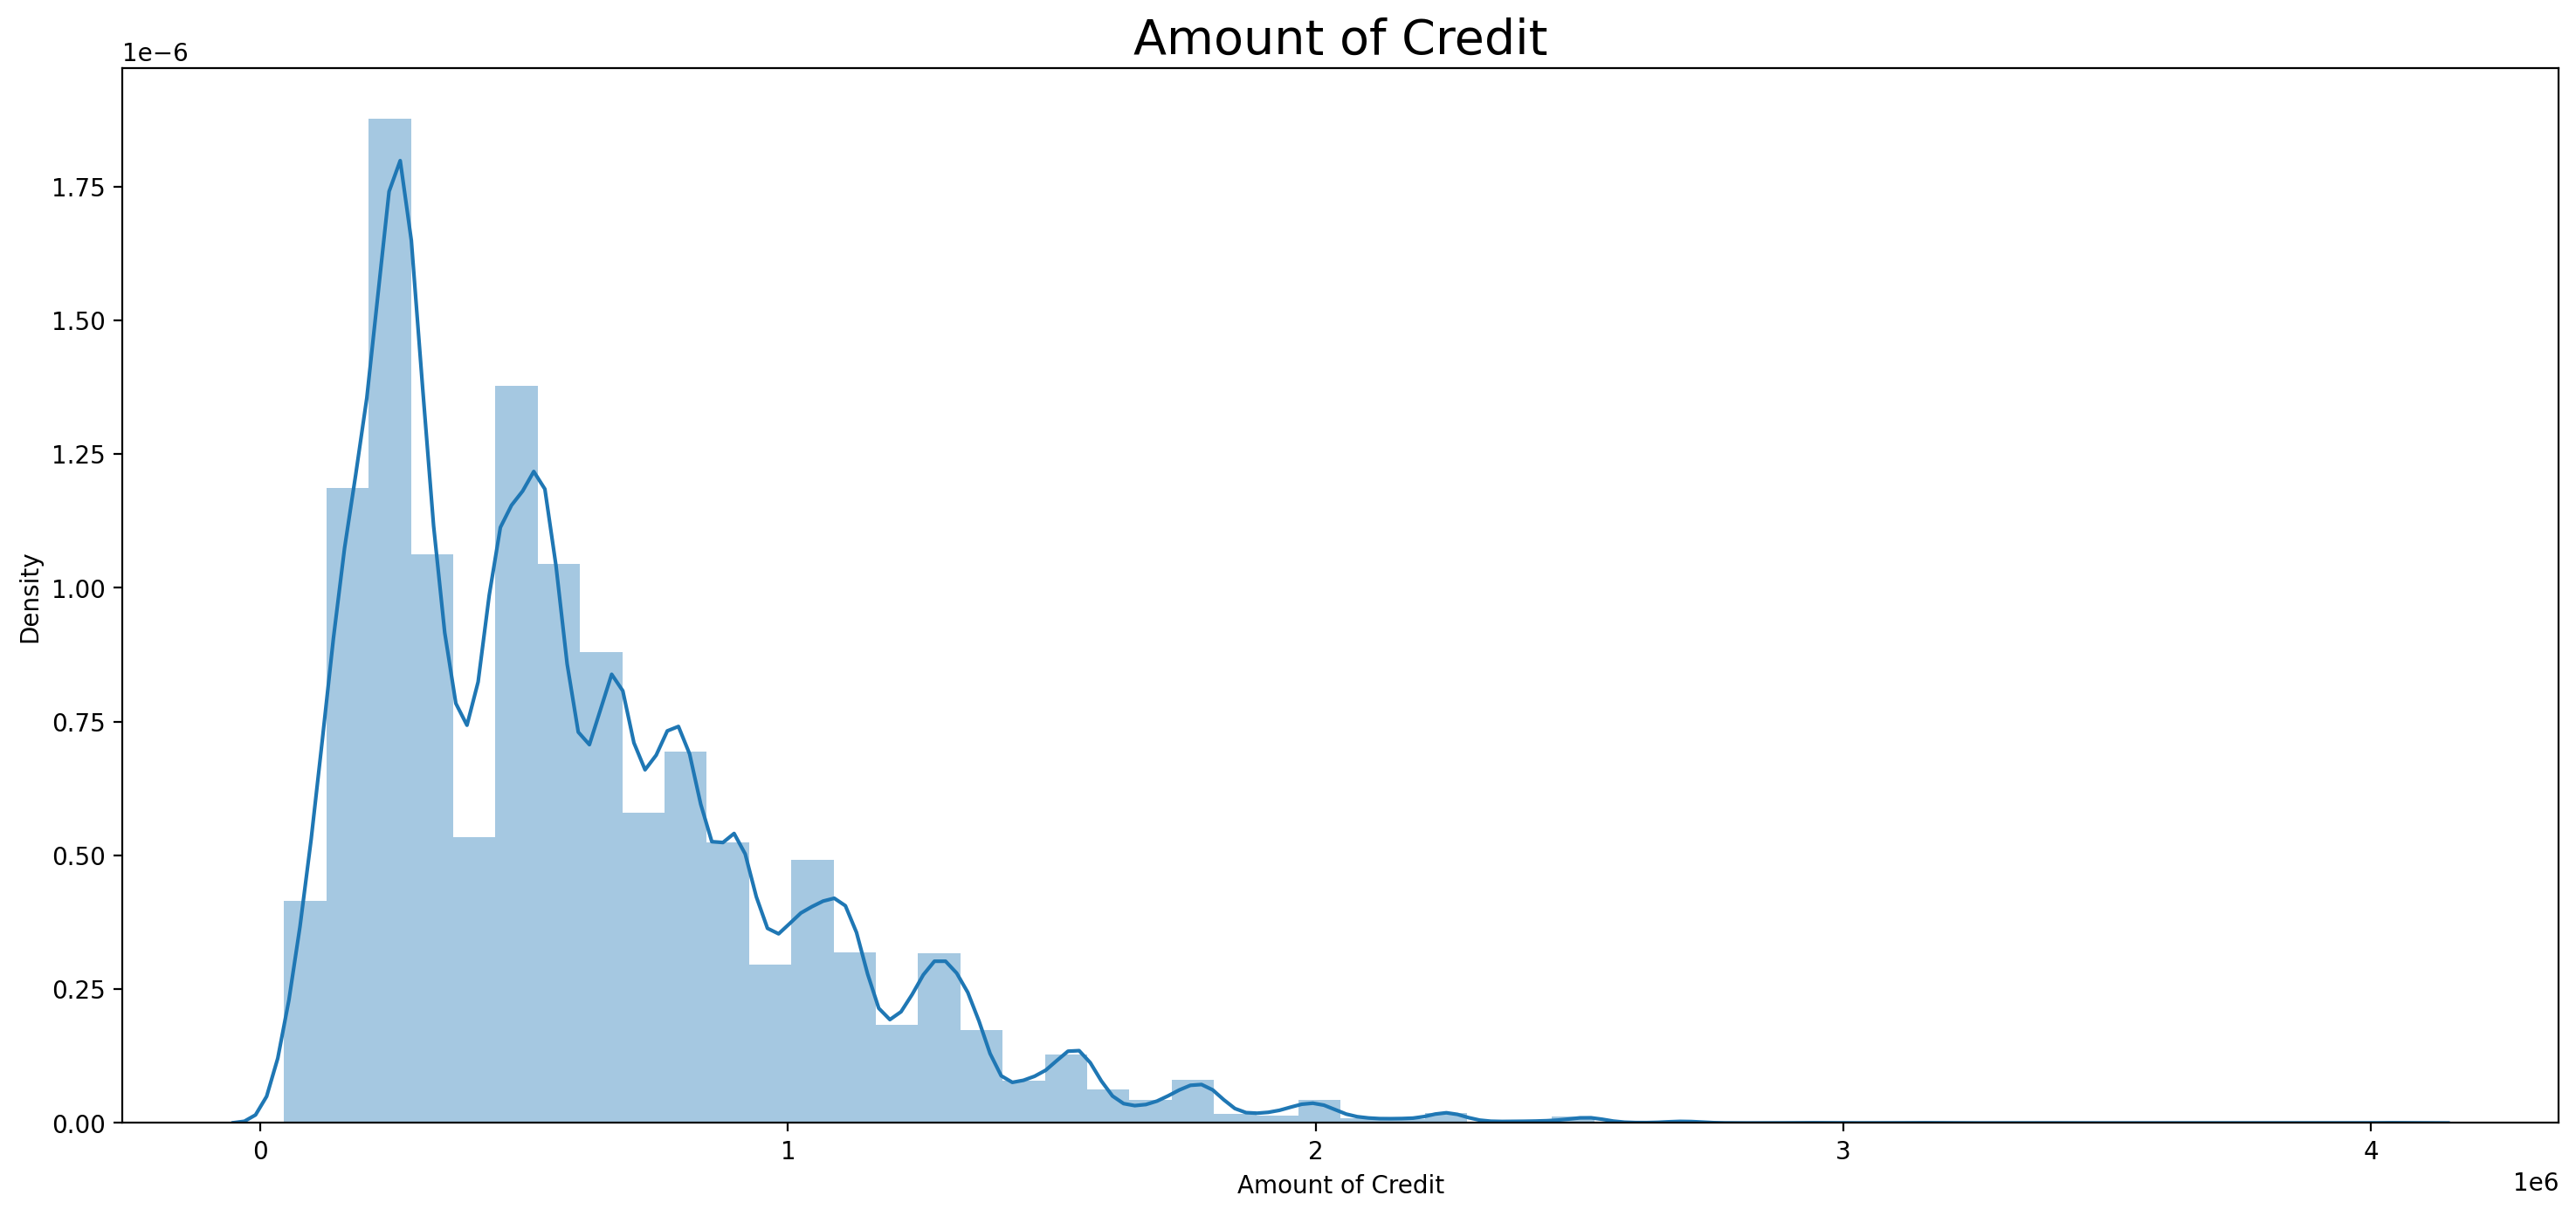

In [384]:
plt.figure(figsize=(18,8),dpi=200)
sns.distplot(df['Amount of Credit'],kde=True)
plt.title('Amount of Credit',fontsize=20);

Text(0.5, 1.0, 'Distribution of owning a car by gender')

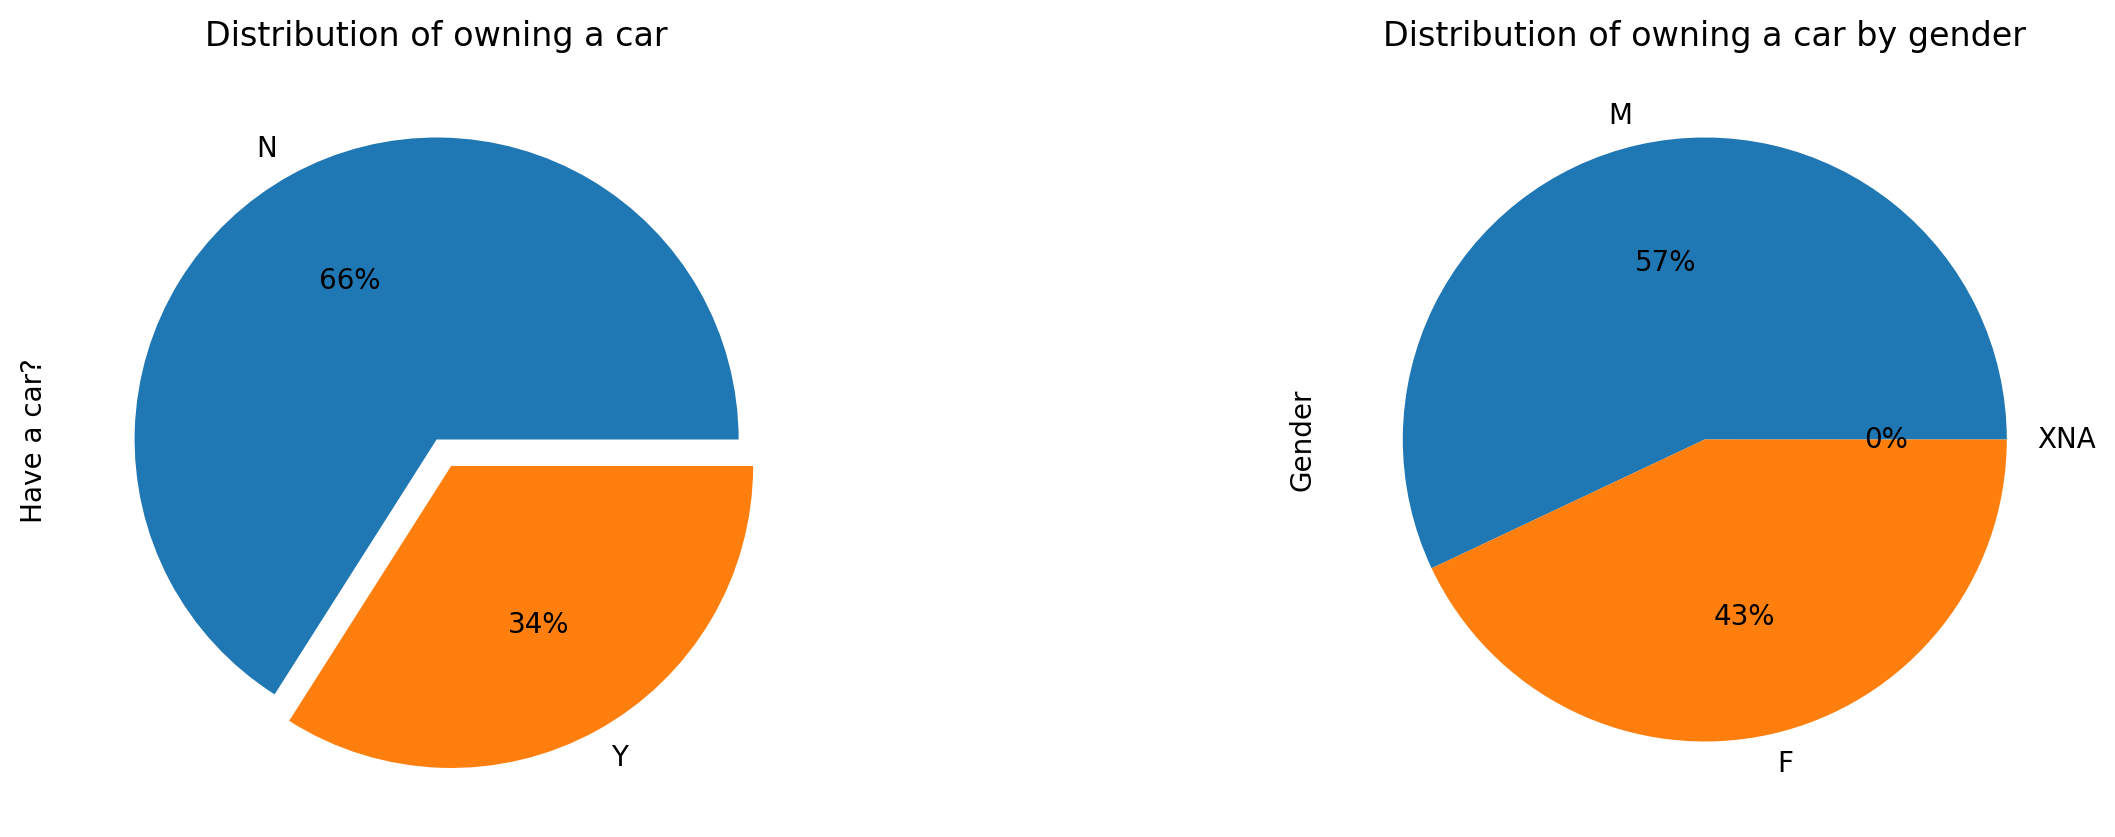

In [312]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
df['Have a car?'].value_counts().plot.pie(autopct = "%1.0f%%",explode=explode)
plt.title('Distribution of owning a car')
plt.subplot(122)
df[df['Have a car?']=='Y']['Gender'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Distribution of owning a car by gender')

##### Distribution of client owning a car. 34% of clients own a car .
##### Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.



<AxesSubplot:xlabel='Have a car?', ylabel='count'>

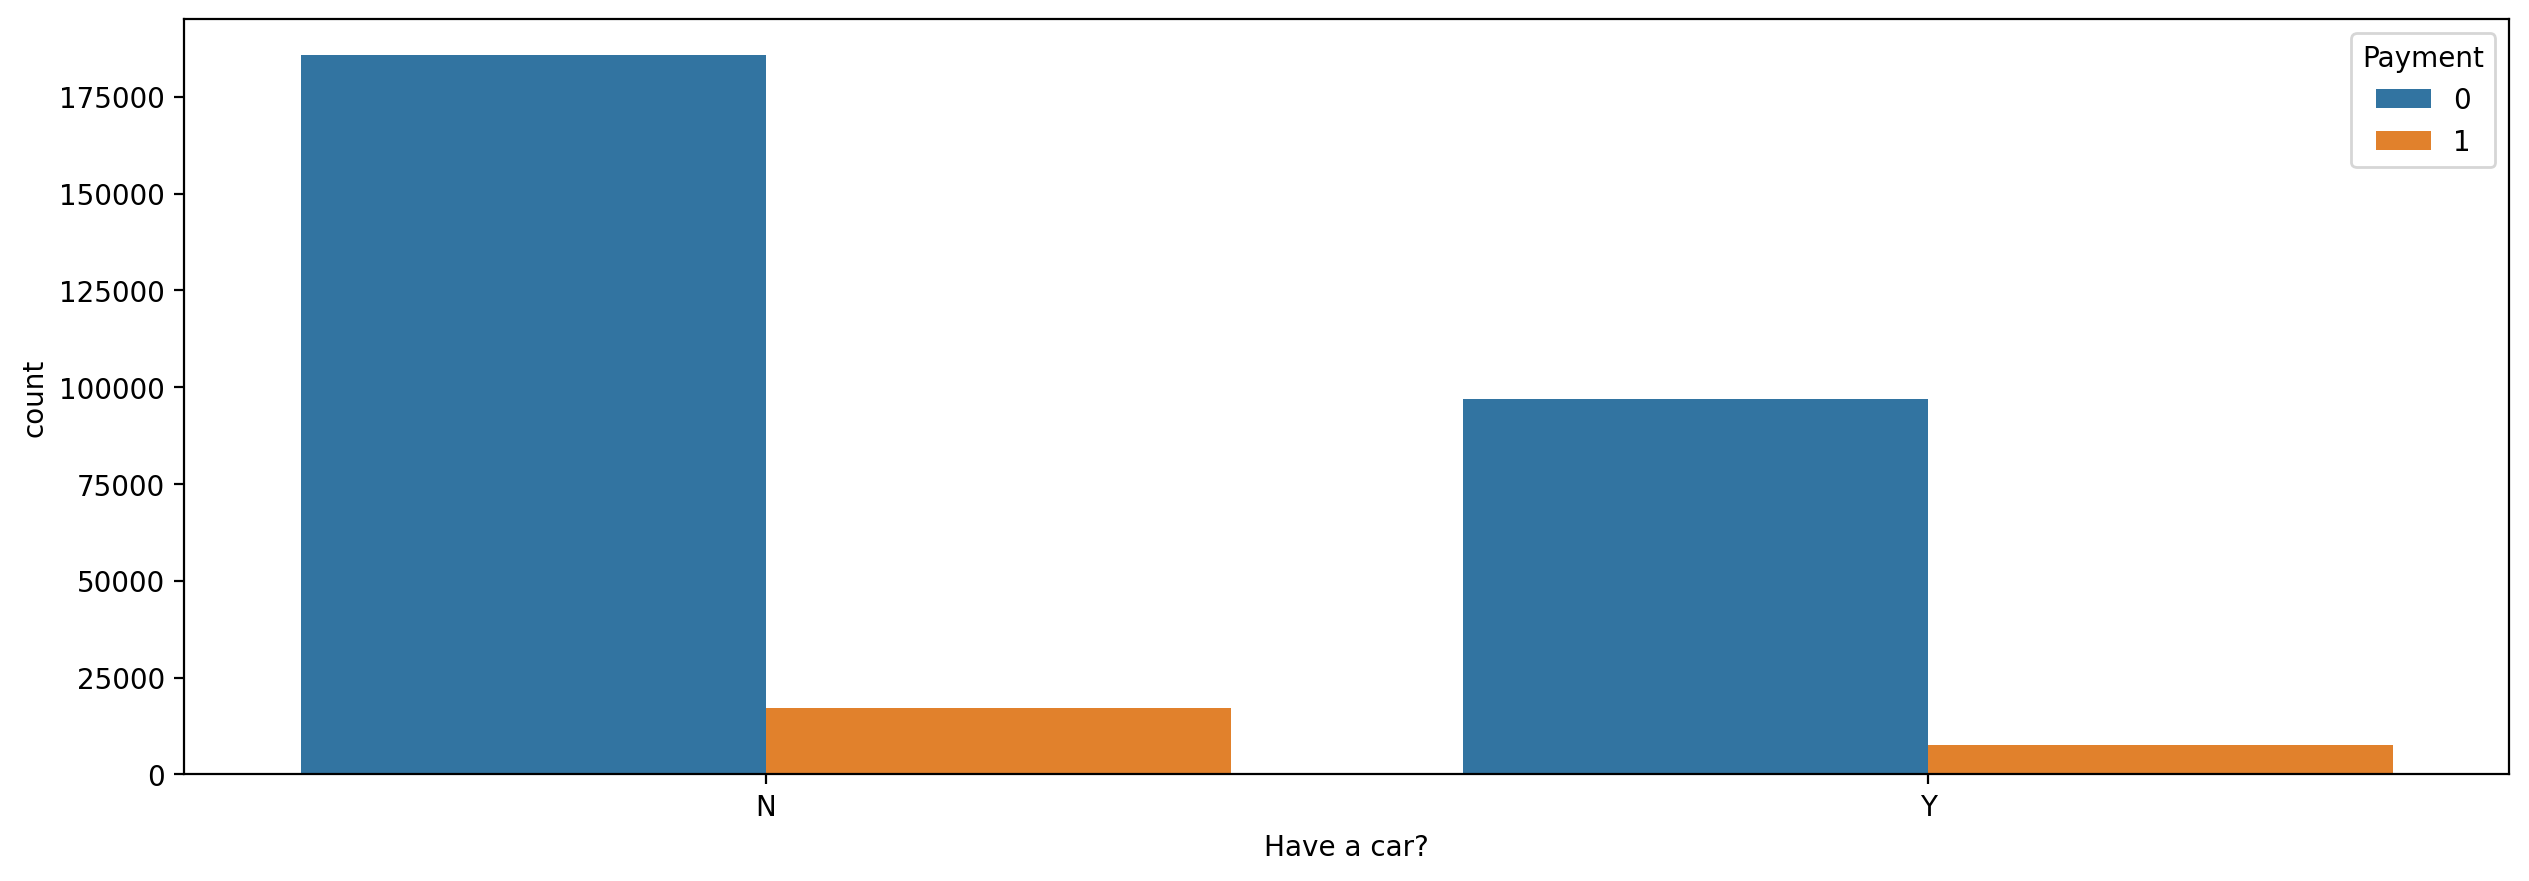

In [425]:
plt.figure(figsize=(15,5),dpi=200)
sns.countplot(x=df['Have a car?'],hue=df['Payment'])

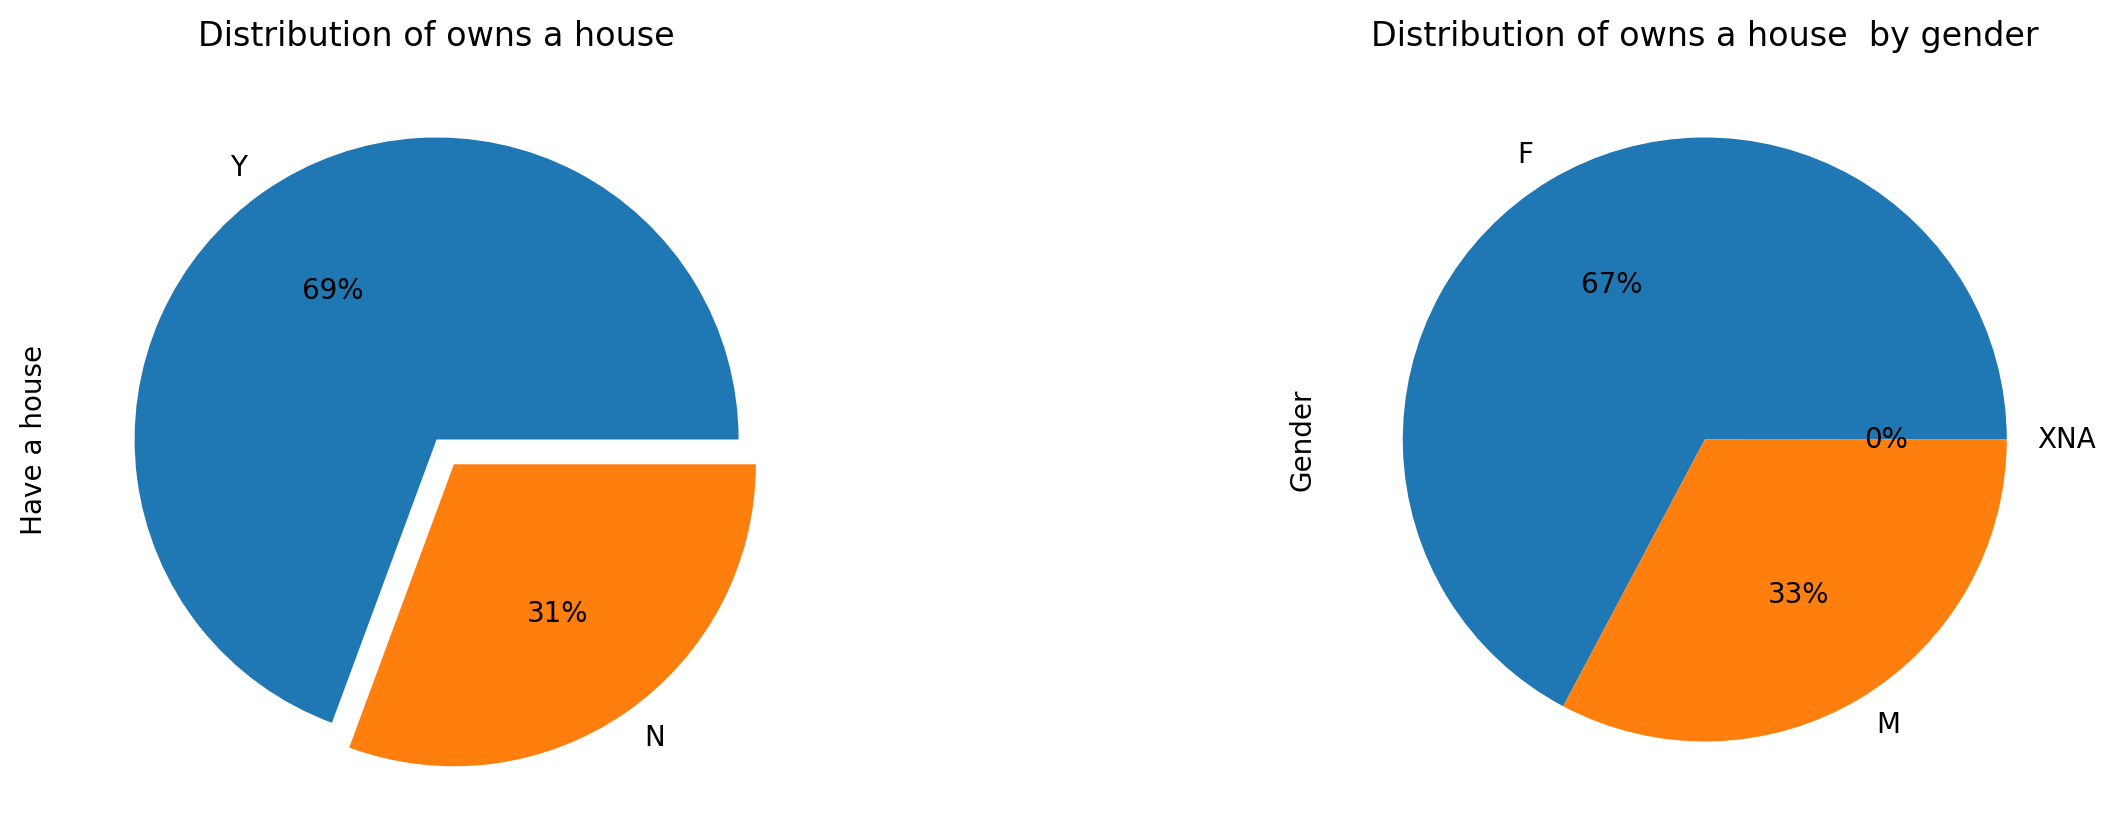

In [311]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
explode=(0,0.1)
df['Have a house'].value_counts().plot.pie(autopct = "%1.0f%%",explode=explode)
plt.title('Distribution of owns a house')
plt.subplot(122)
df[df['Have a house']=='Y']['Gender'].value_counts().plot.pie(autopct = "%1.0f%%")
plt.title('Distribution of owns a house  by gender');

##### Distribution of client owning a house. 69% of clients own a house or flat .
##### Distribution of client owning a house by gender. Out of total clients who own house 33% are male and 67% are female.

<AxesSubplot:xlabel='Have a house', ylabel='count'>

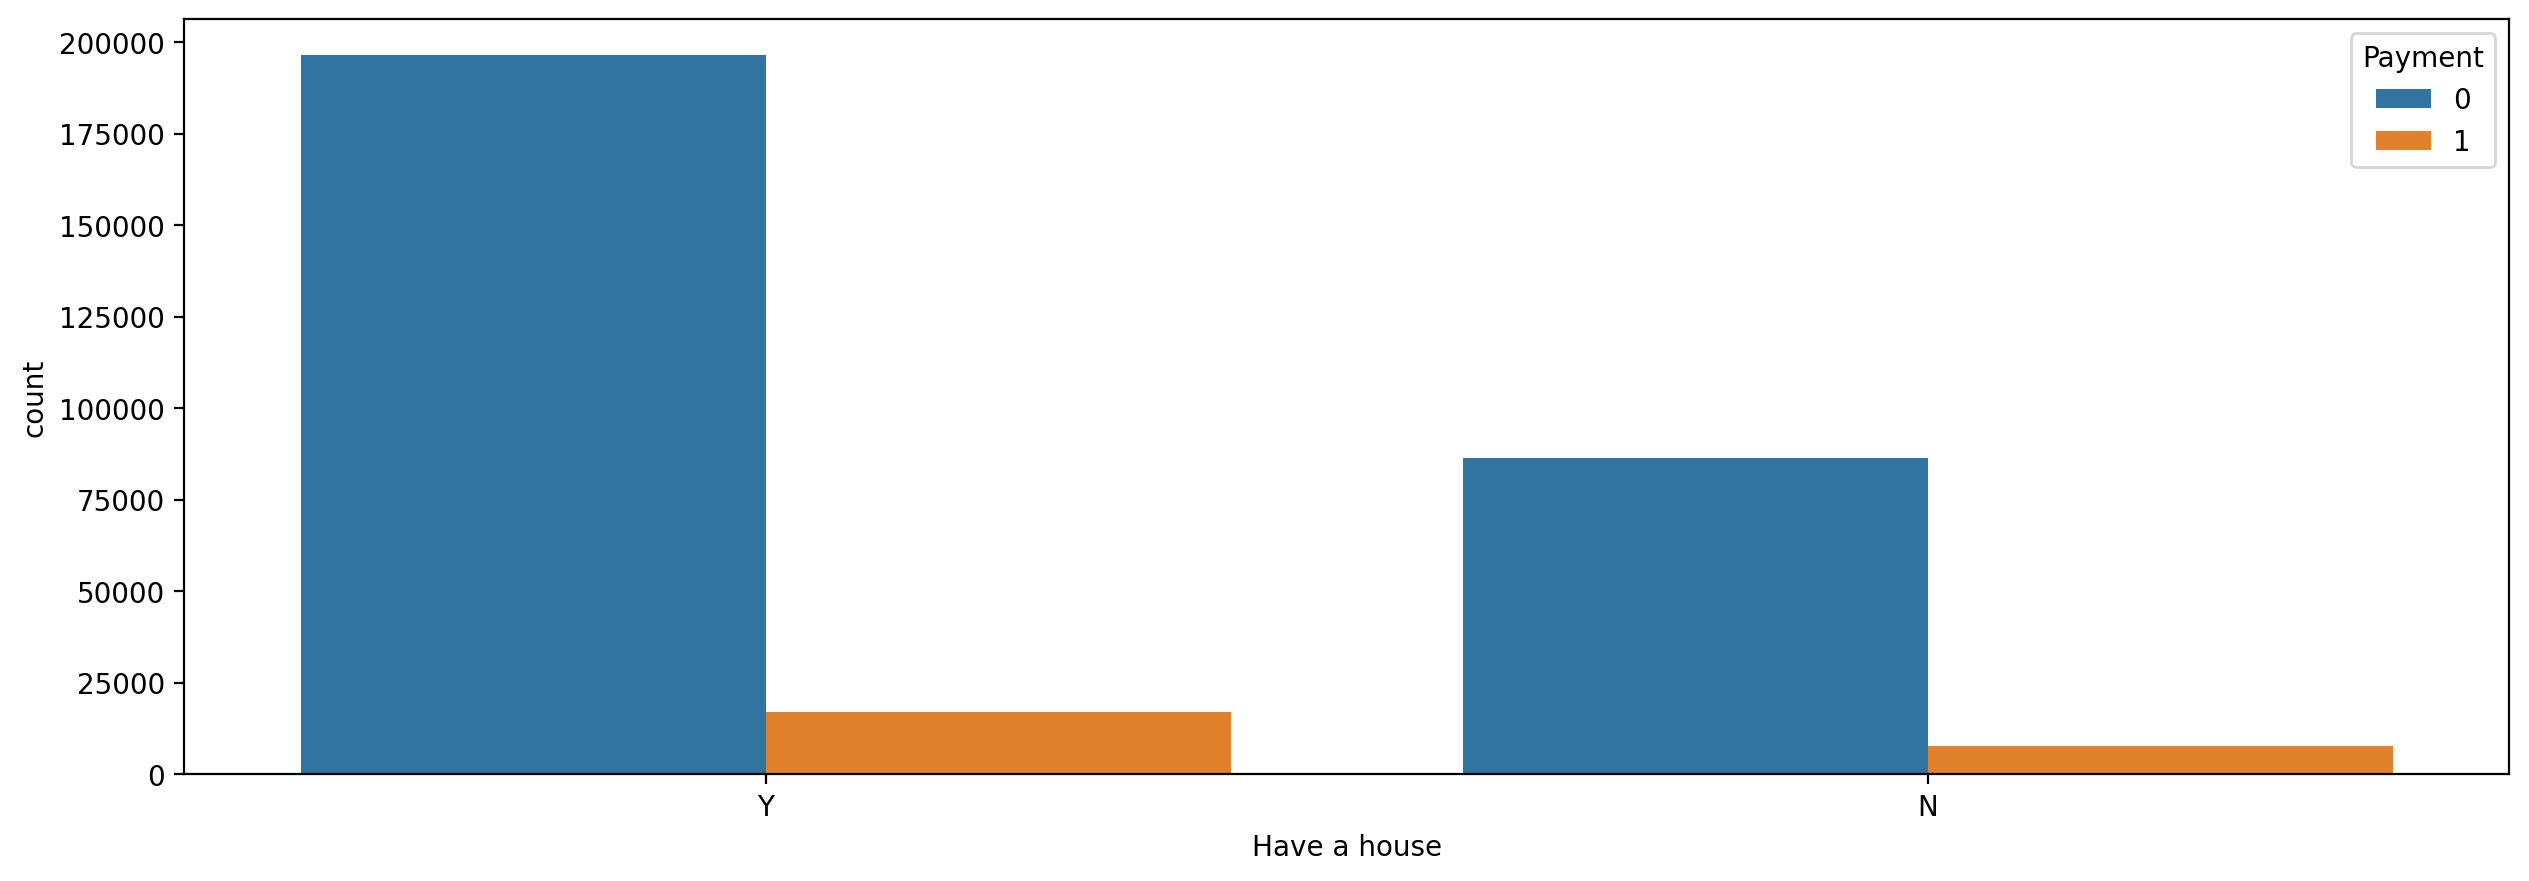

In [424]:
plt.figure(figsize=(15,5),dpi=200)
sns.countplot(x=df['Have a house'],hue=df['Payment'])

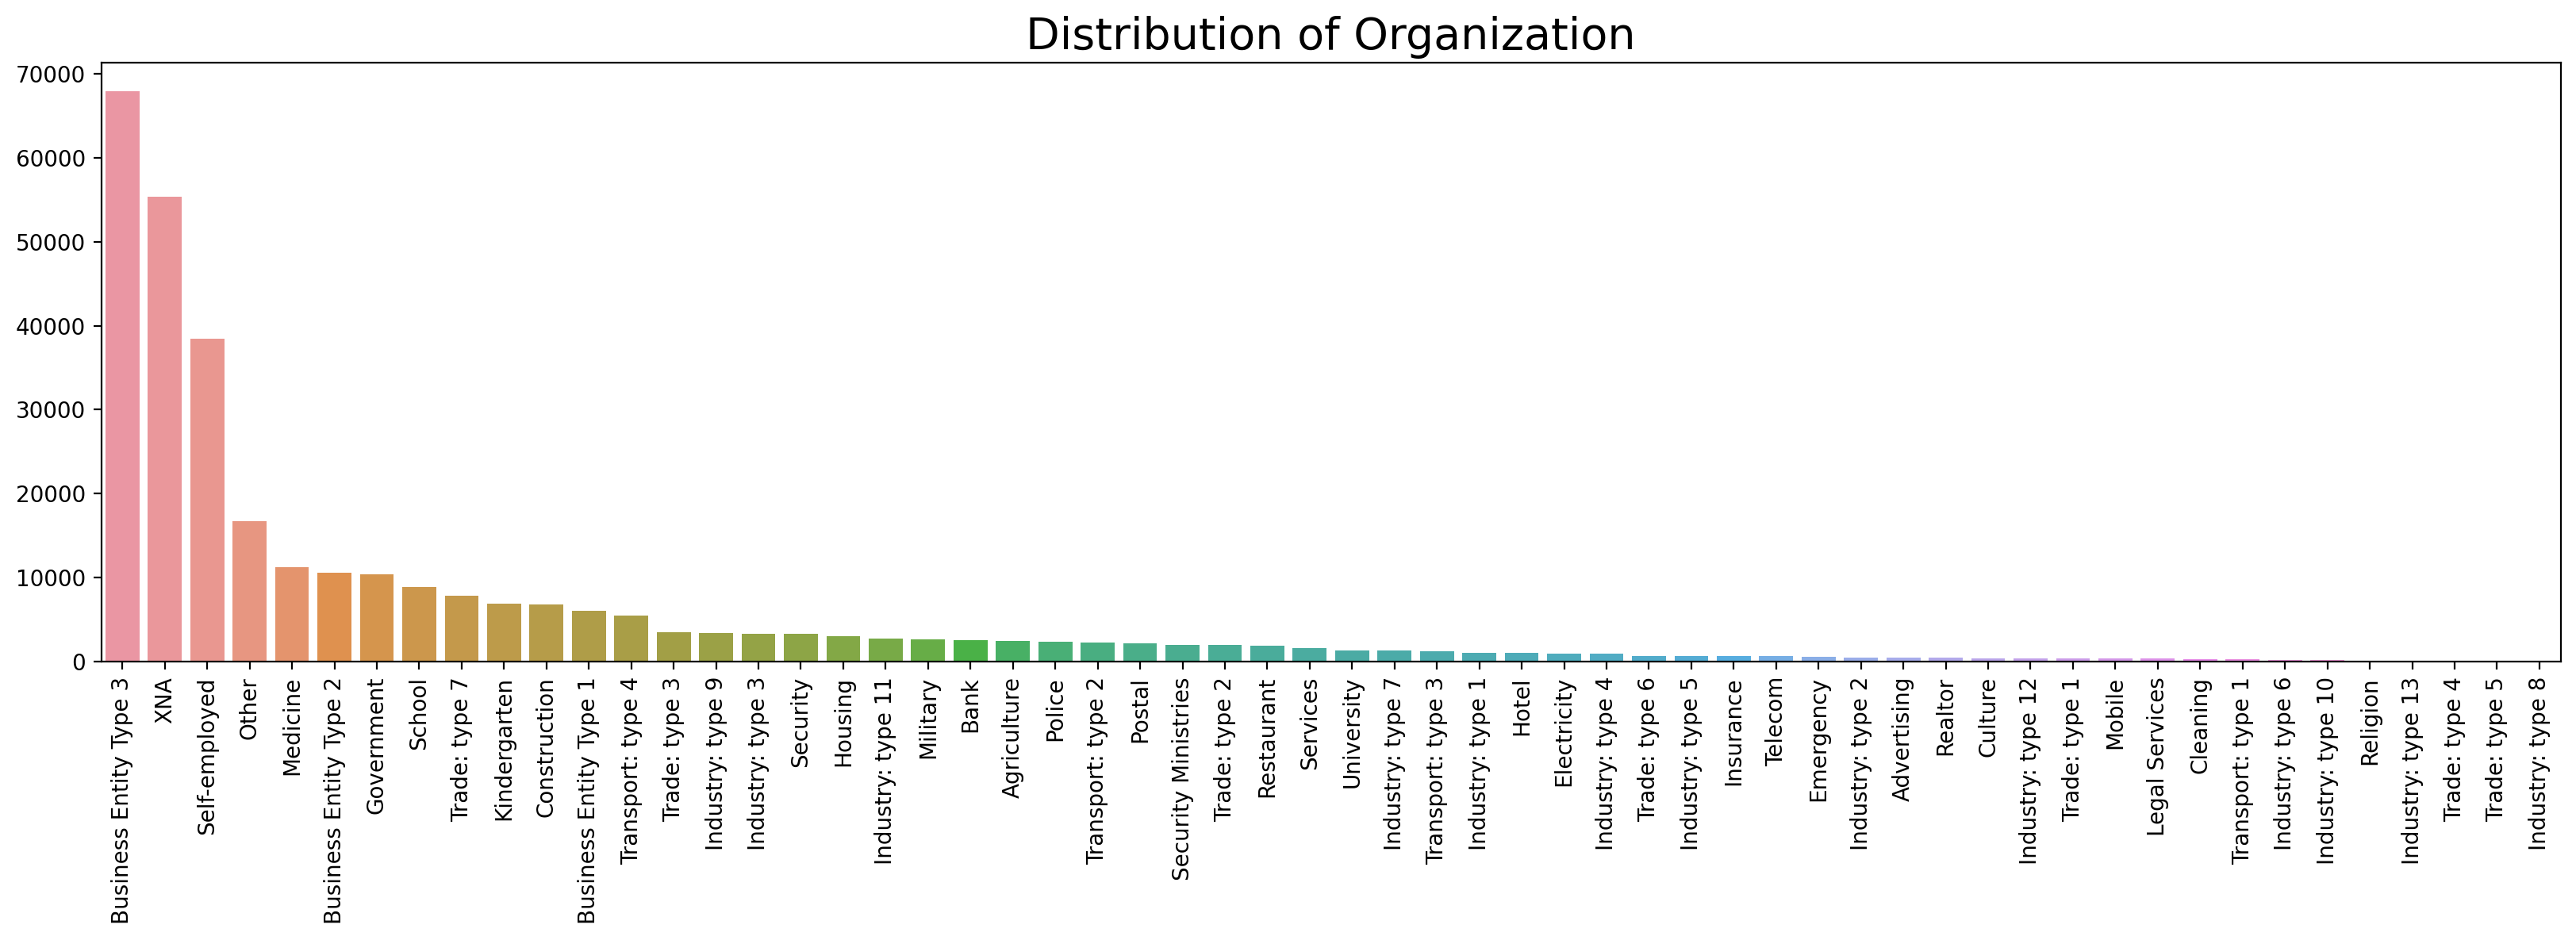

In [442]:
plt.figure(figsize=(20,5),dpi=200)
sns.barplot(x=df['Organization'].value_counts().index,y=df['Organization'].value_counts().values,data=df)
plt.title('Distribution of Organization',fontsize=20)
plt.xticks(rotation=90);

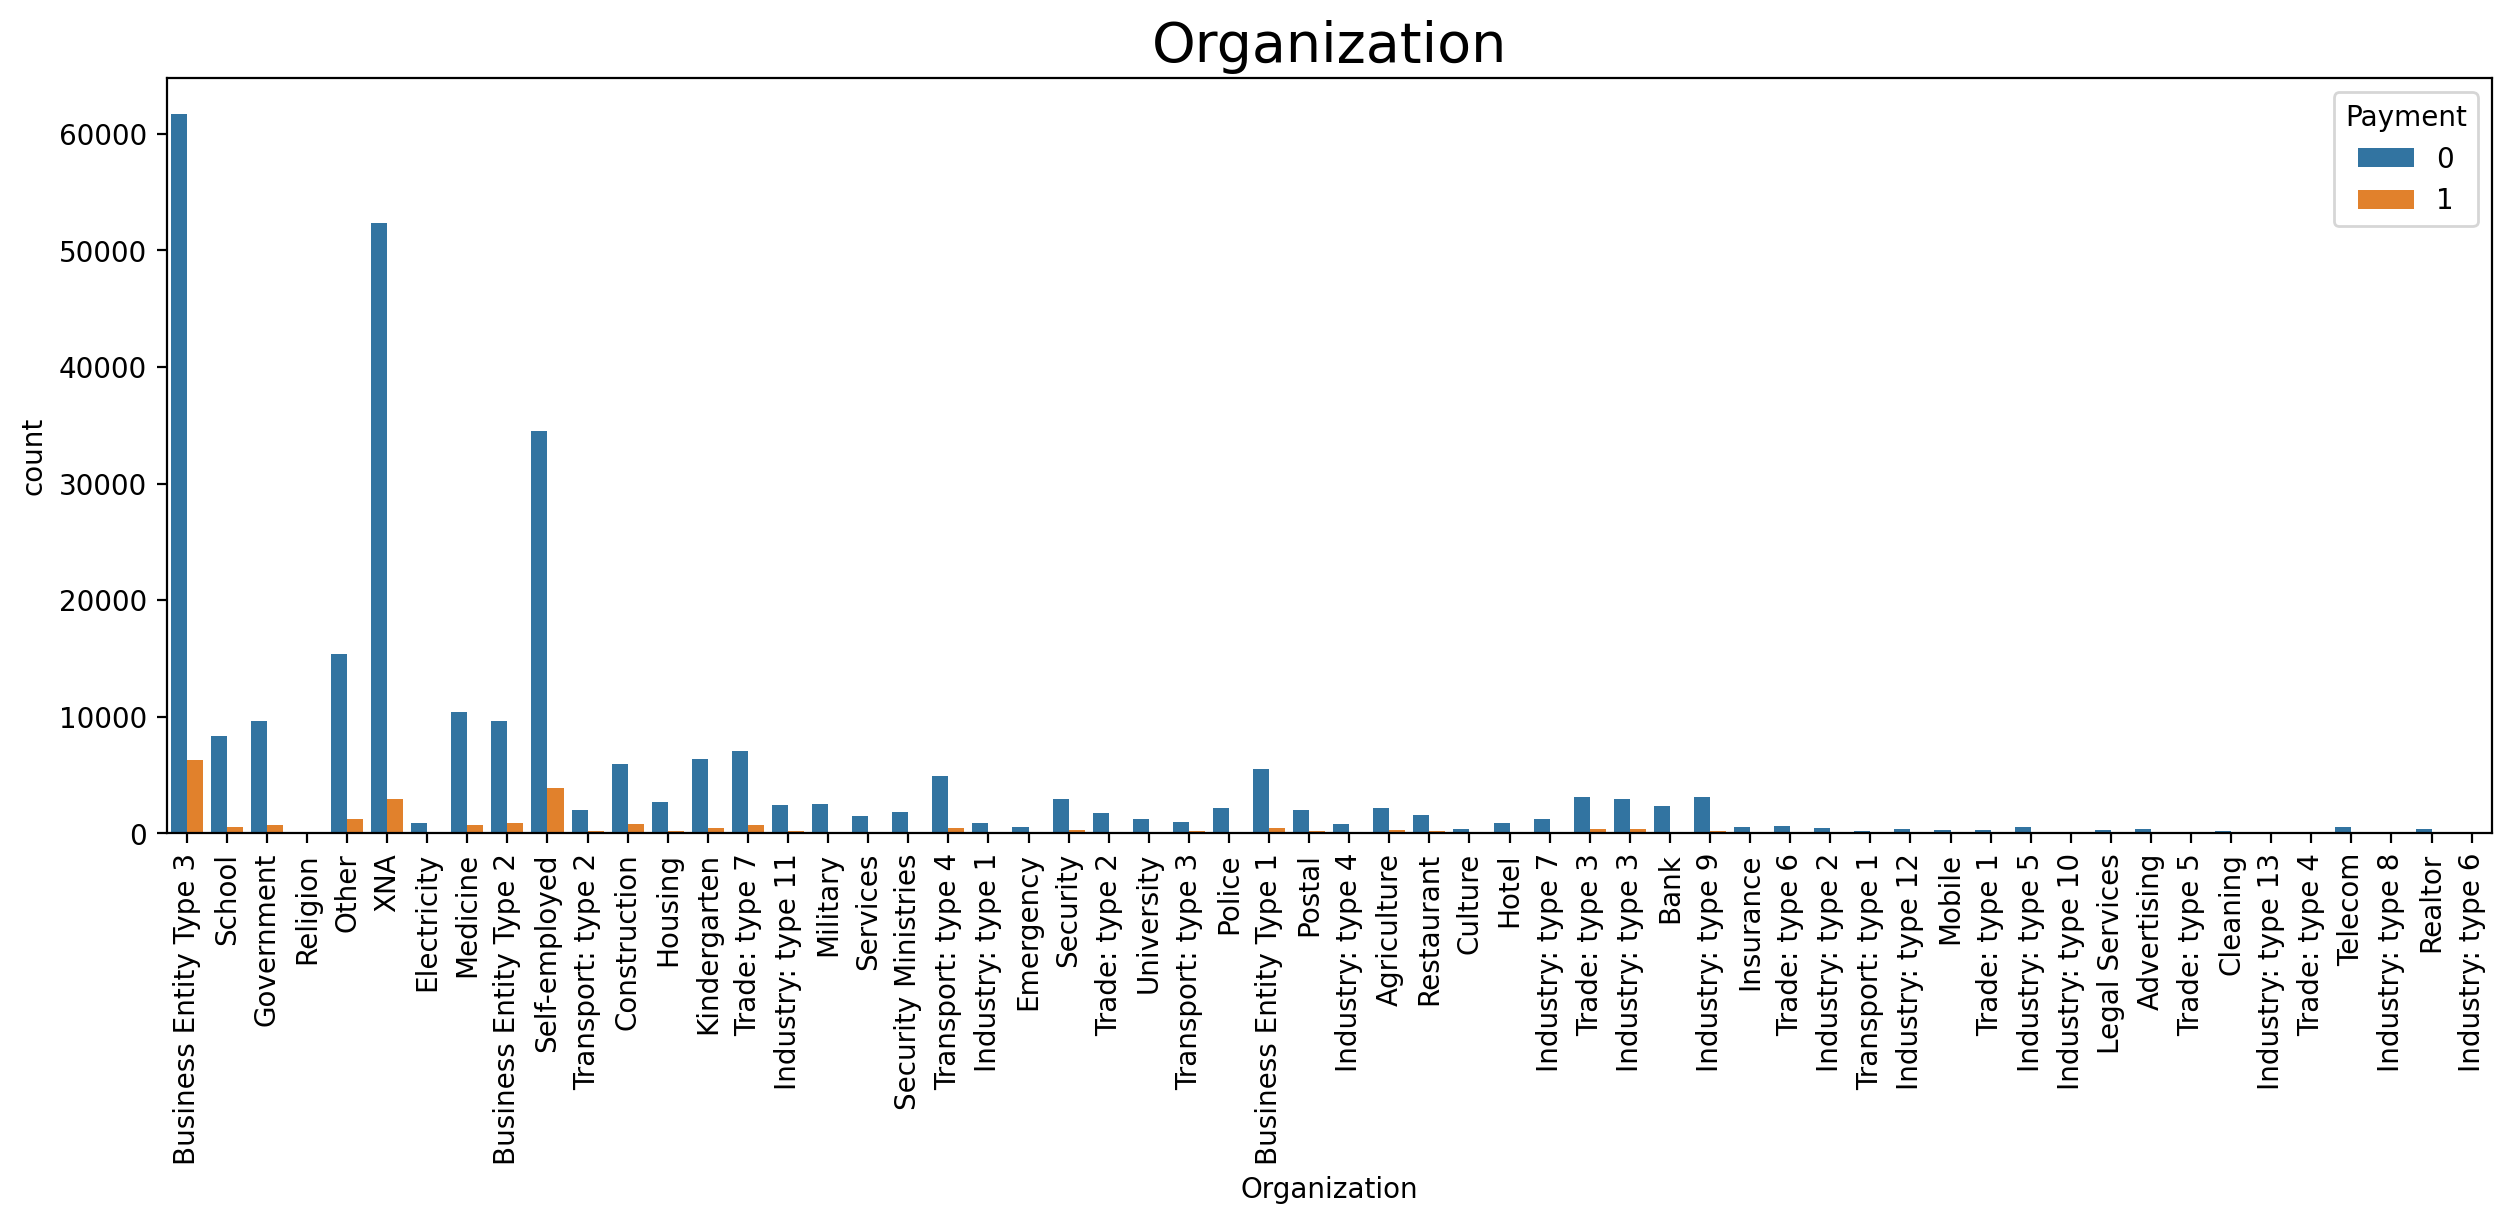

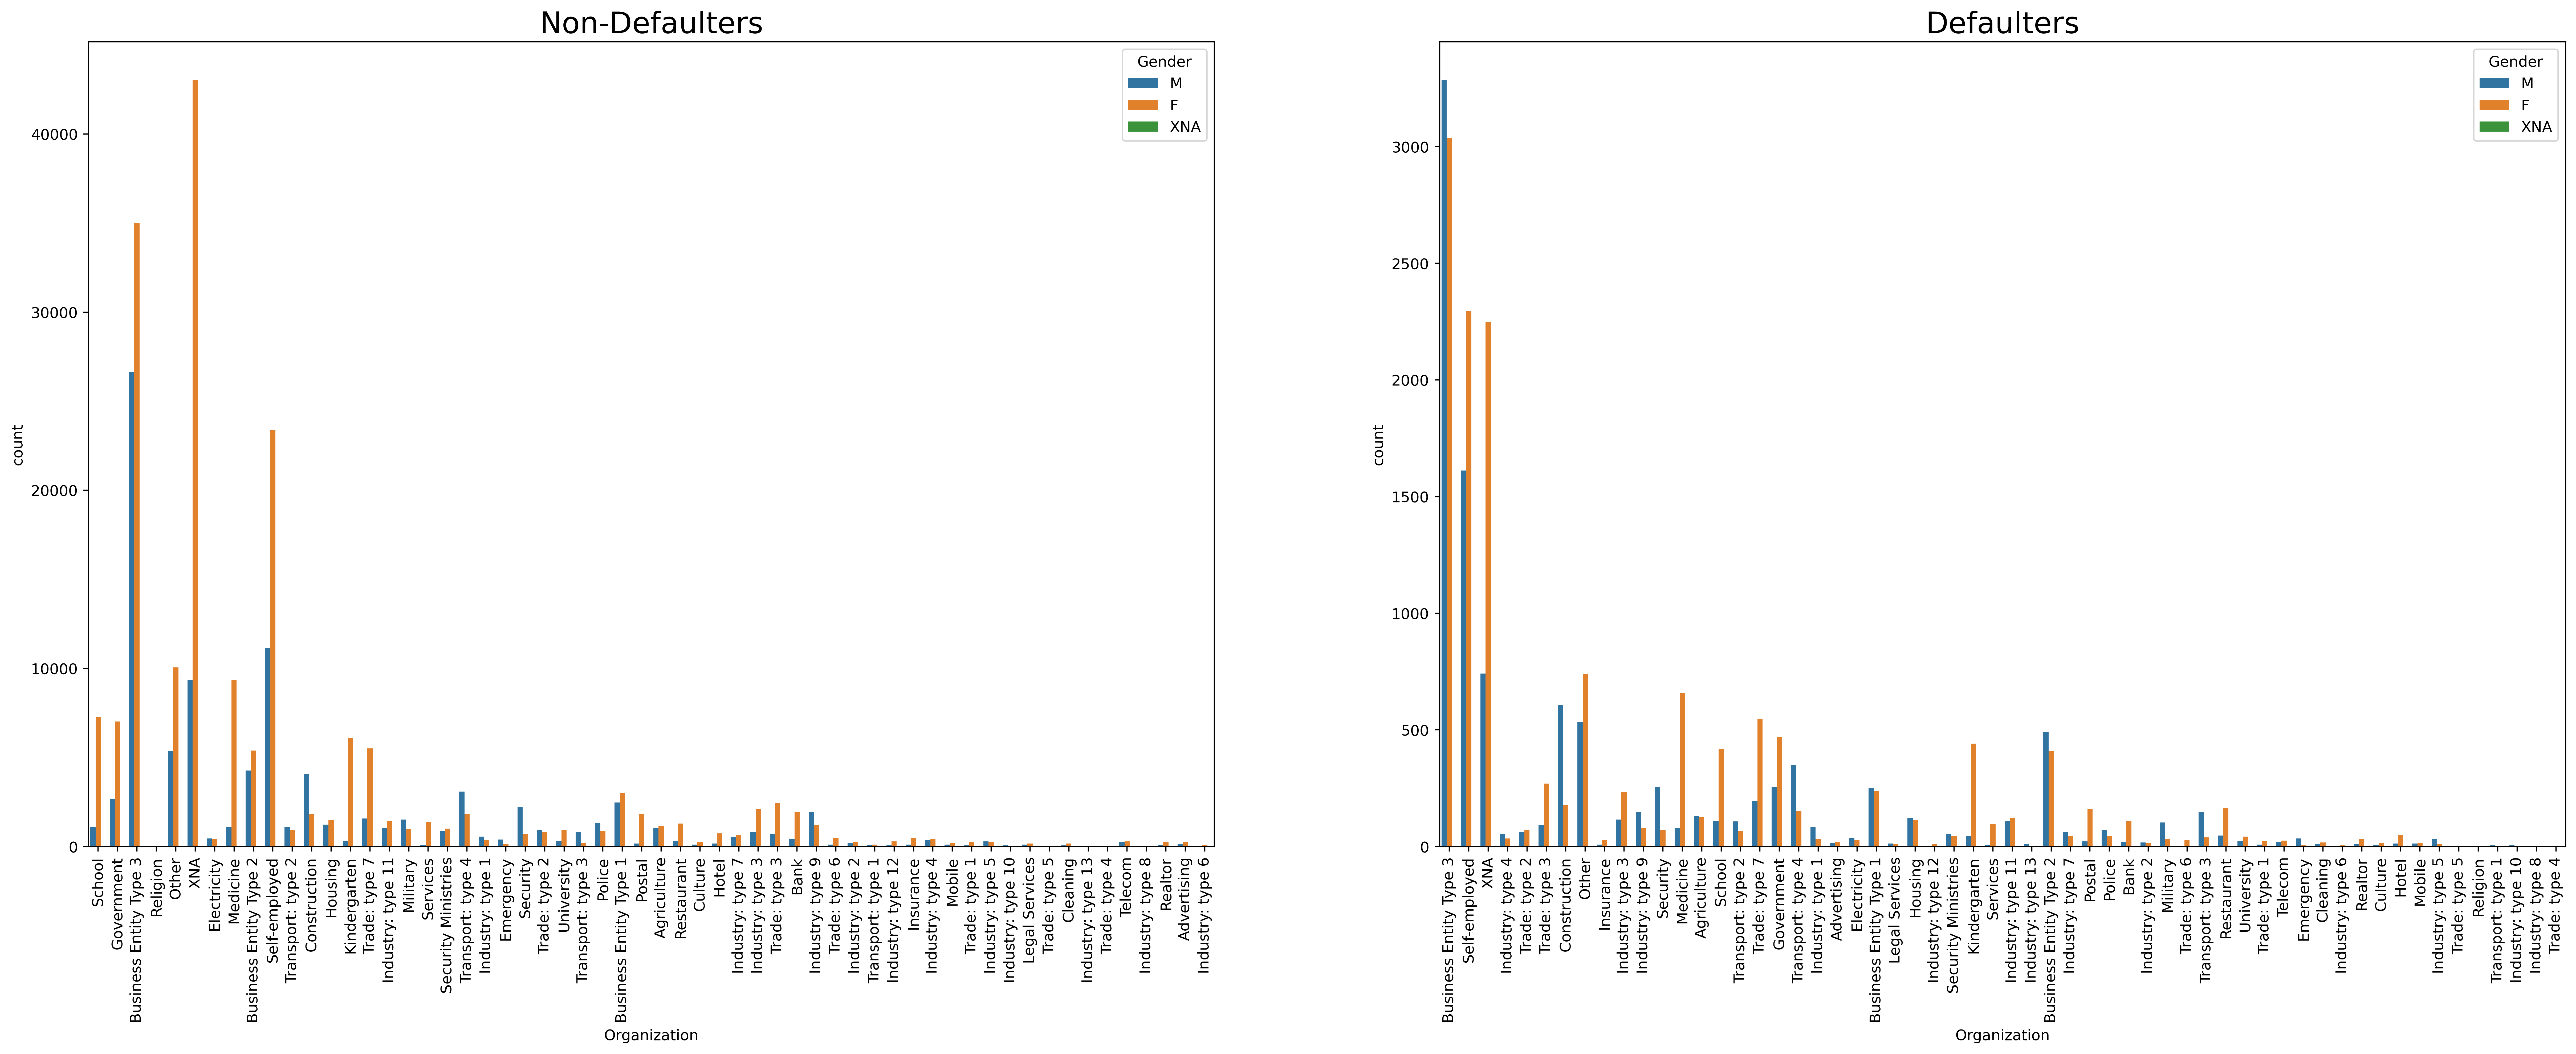

In [529]:
plt.figure(figsize=(15,5),dpi=200)
sns.countplot(x=df['Organization'],hue=df['Payment'])
plt.title('Organization',fontsize=20)
plt.xticks(rotation=90);

plt.figure(figsize=(30,10),dpi=400)
plt.subplot(121)
sns.countplot(x=Non_Defaulters['Organization'],hue=df['Gender'])
plt.title('Non-Defaulters',fontsize=20)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=Defaulters['Organization'],hue=df['Gender'])
plt.title('Defaulters',fontsize=20)
plt.xticks(rotation=90);

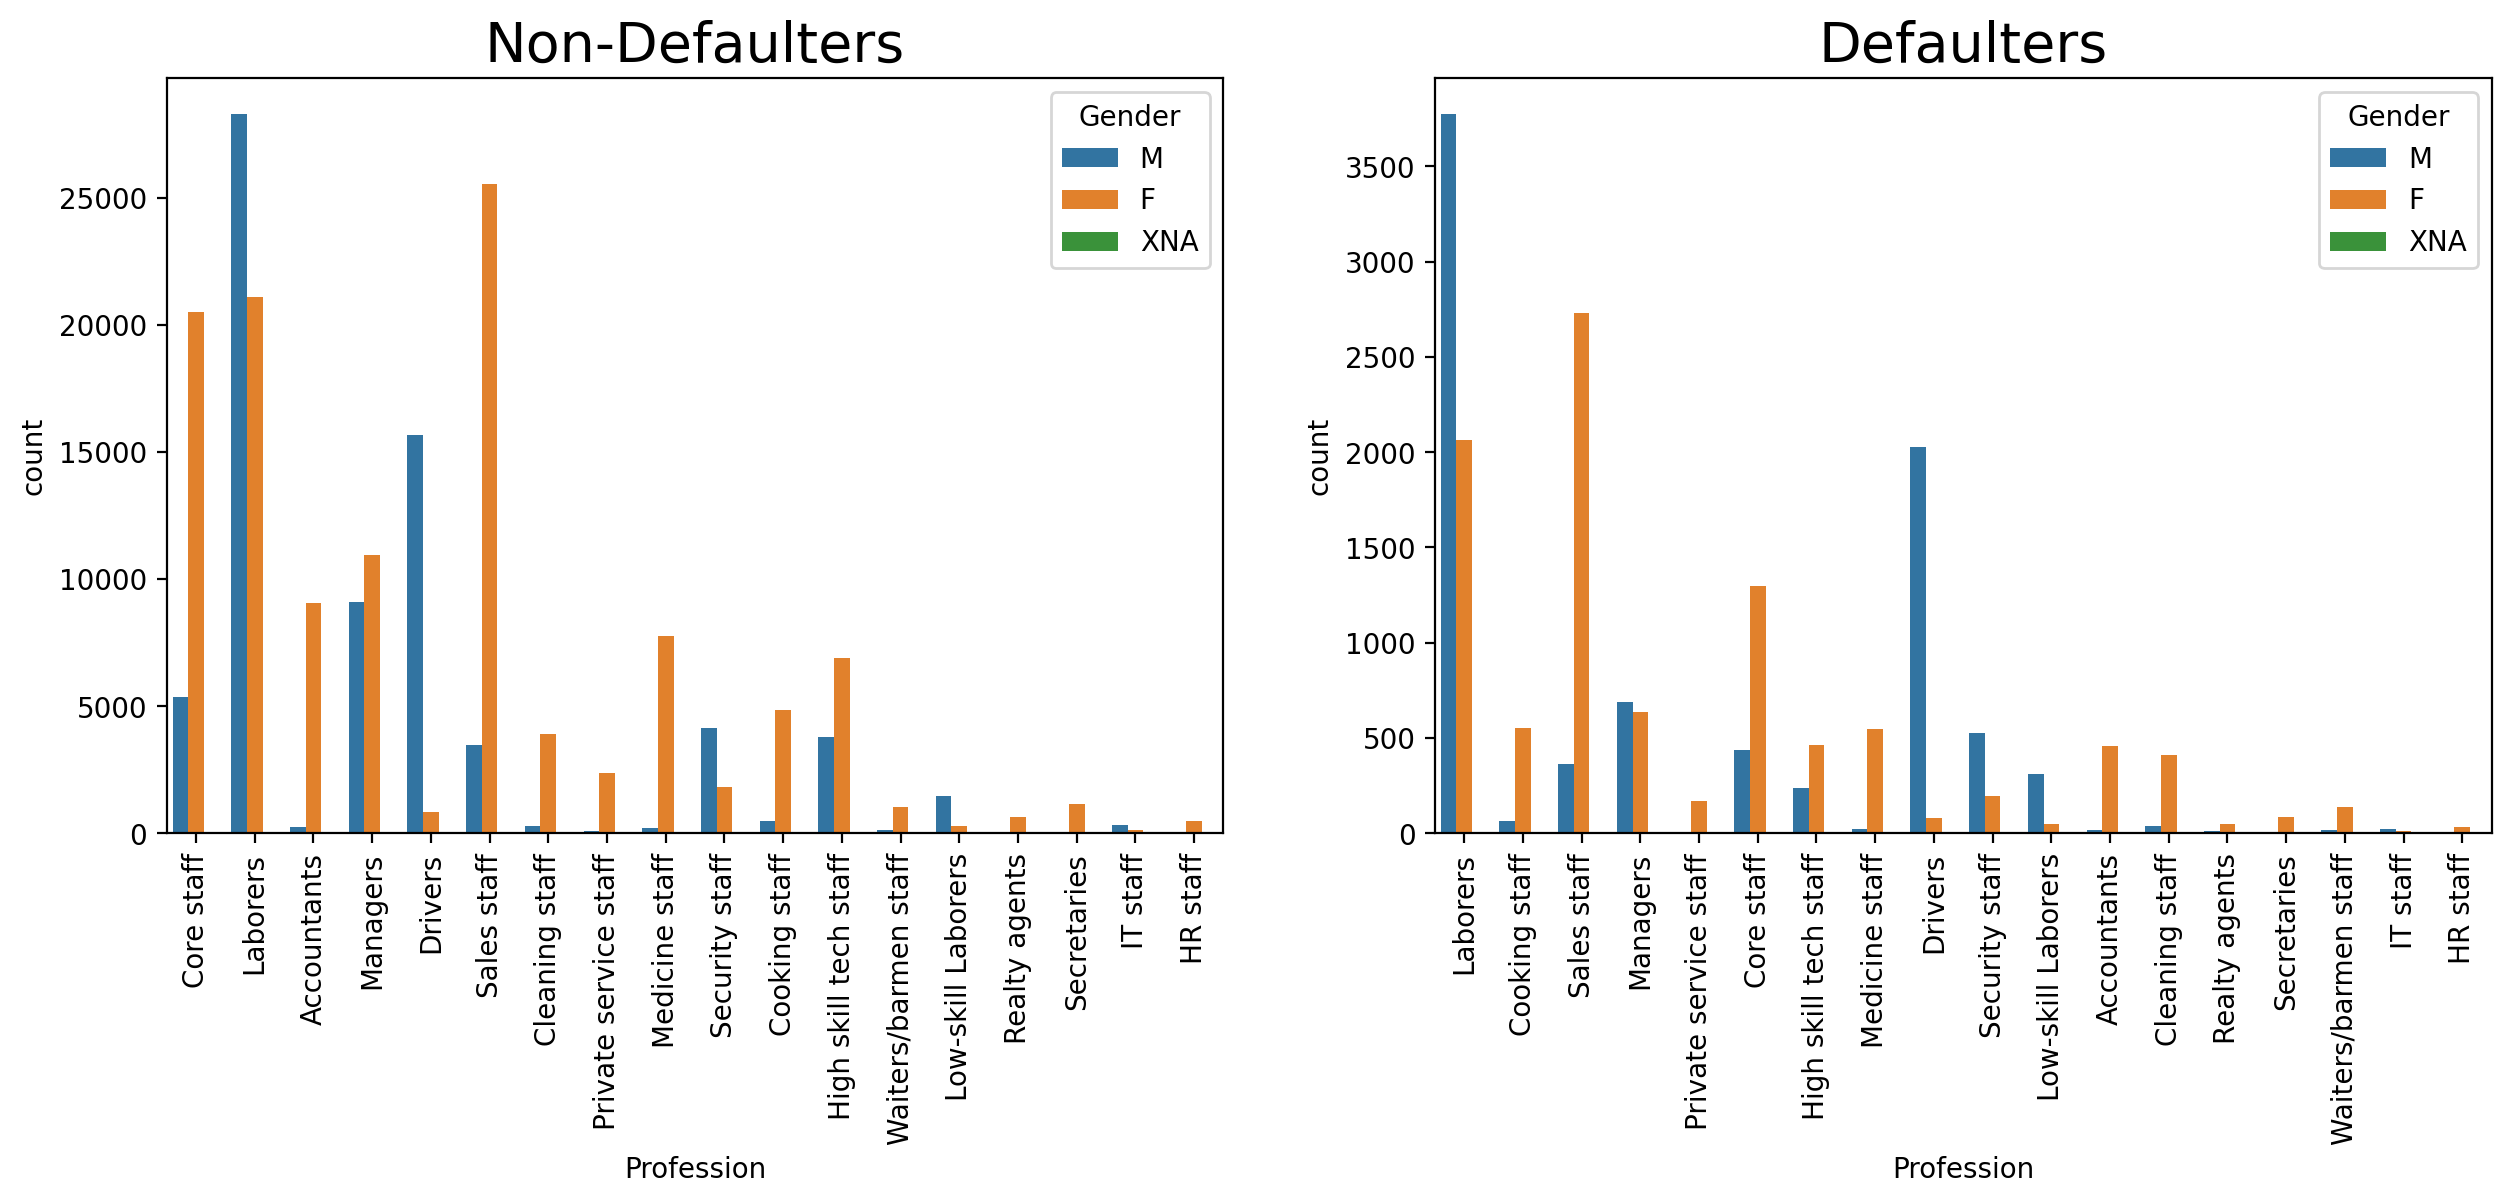

In [506]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
sns.countplot(x=Non_Defaulters['Profession'],hue=df['Gender'])
plt.title('Non-Defaulters',fontsize=20)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=Defaulters['Profession'],hue=df['Gender'])
plt.title('Defaulters',fontsize=20)
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Defaulters')

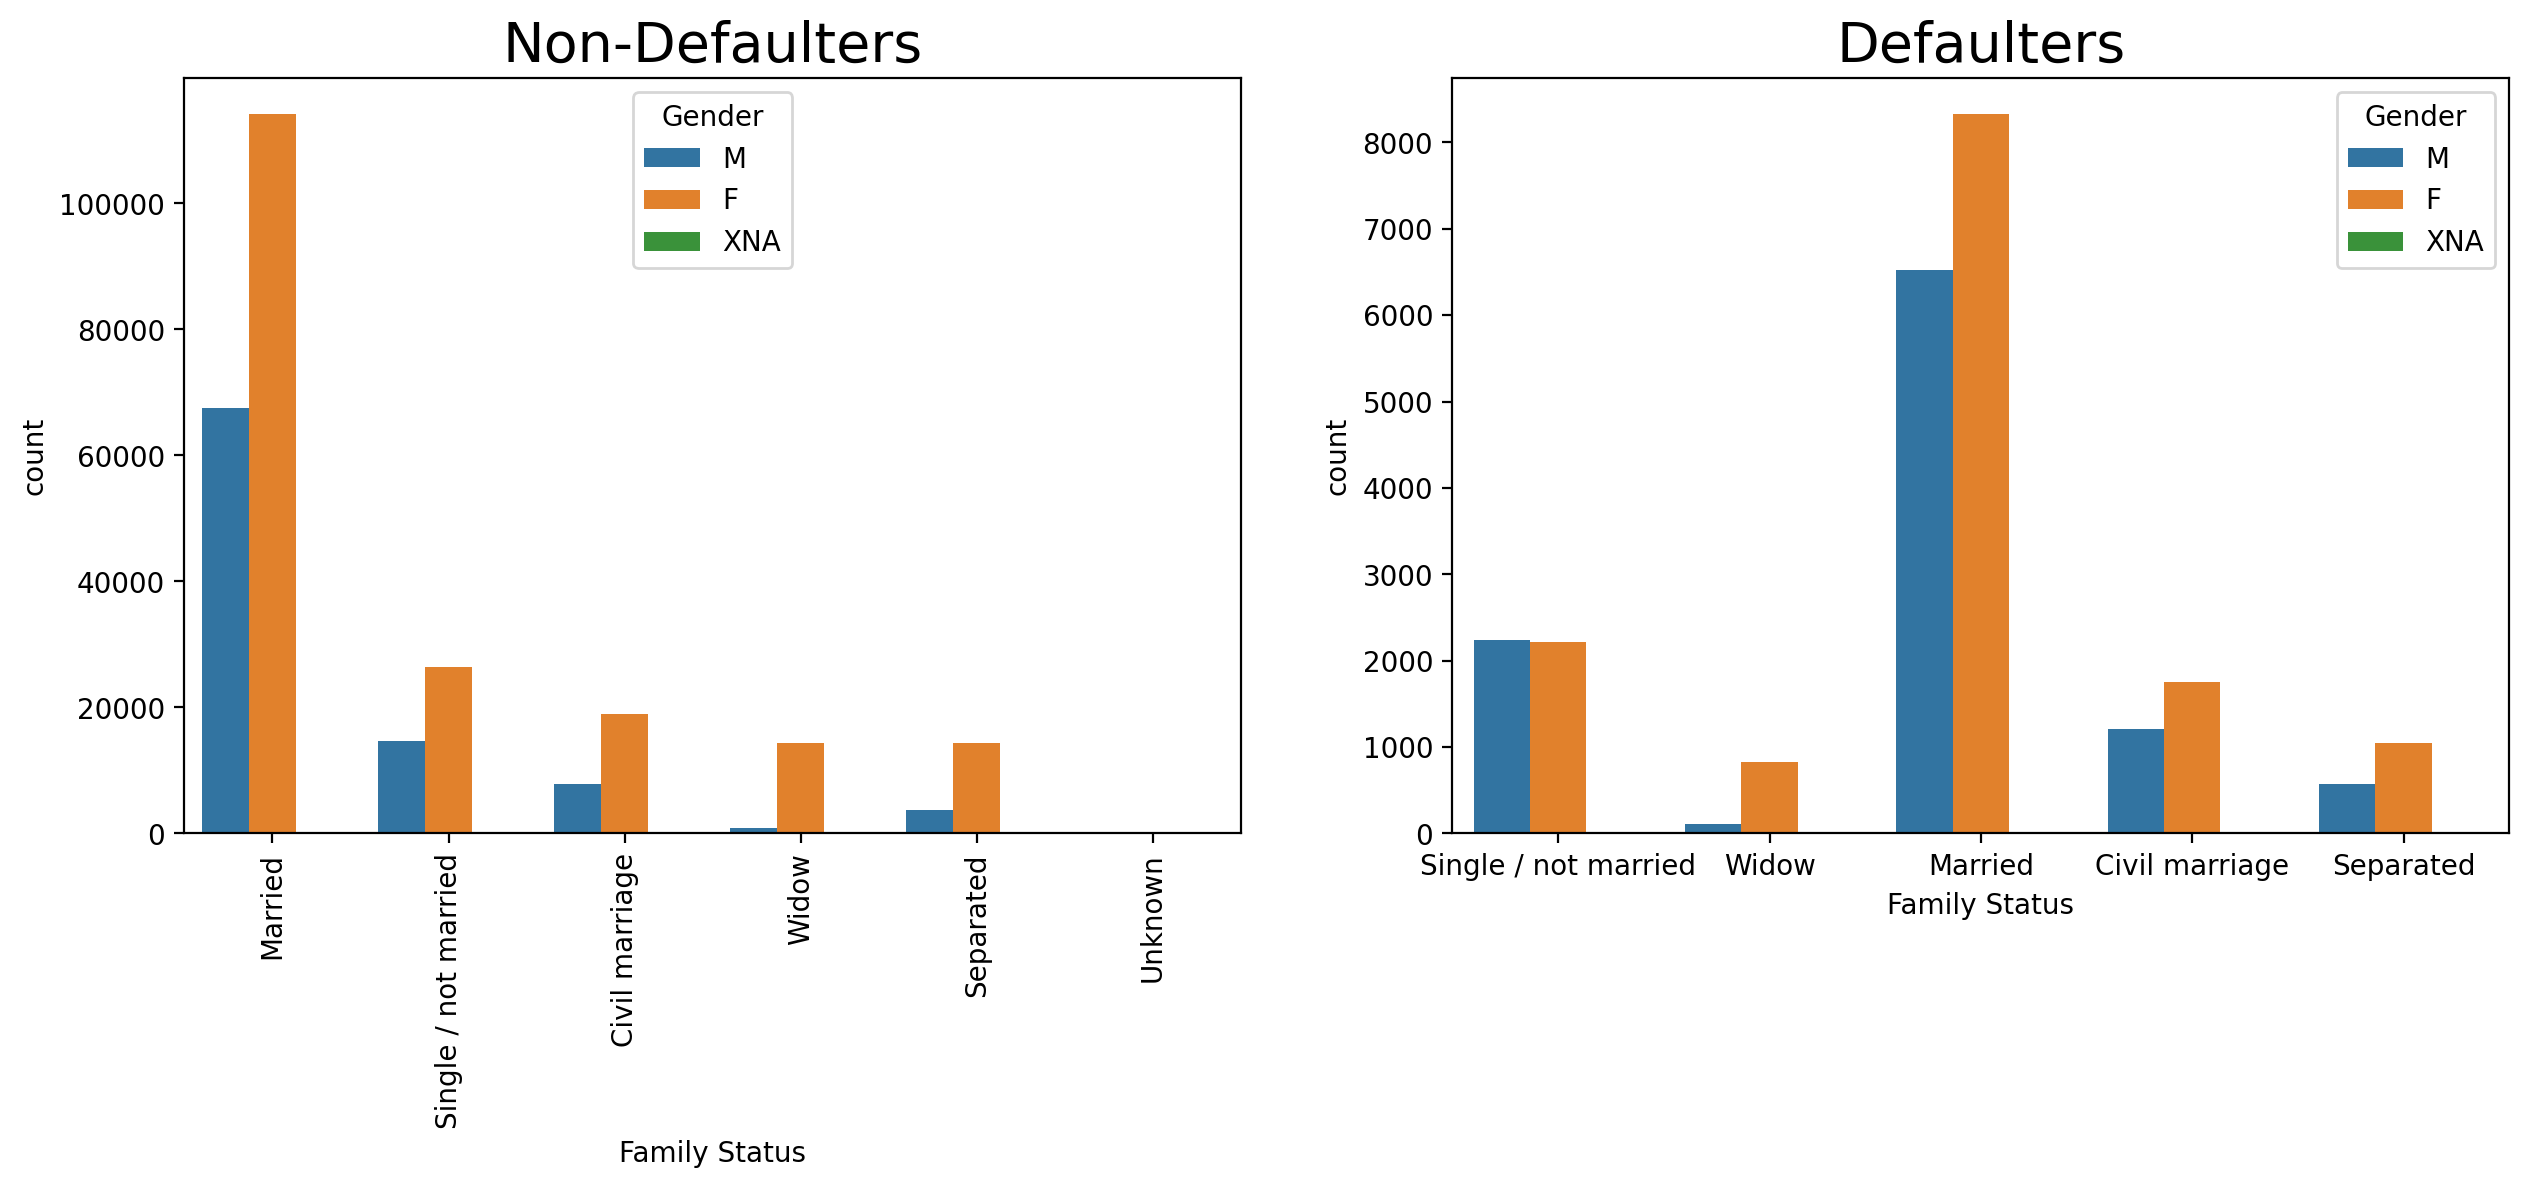

In [522]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
sns.countplot(x=Non_Defaulters['Family Status'],hue=df['Gender'])
plt.title('Non-Defaulters',fontsize=20)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=Defaulters['Family Status'],hue=df['Gender'])
plt.title('Defaulters',fontsize=20)

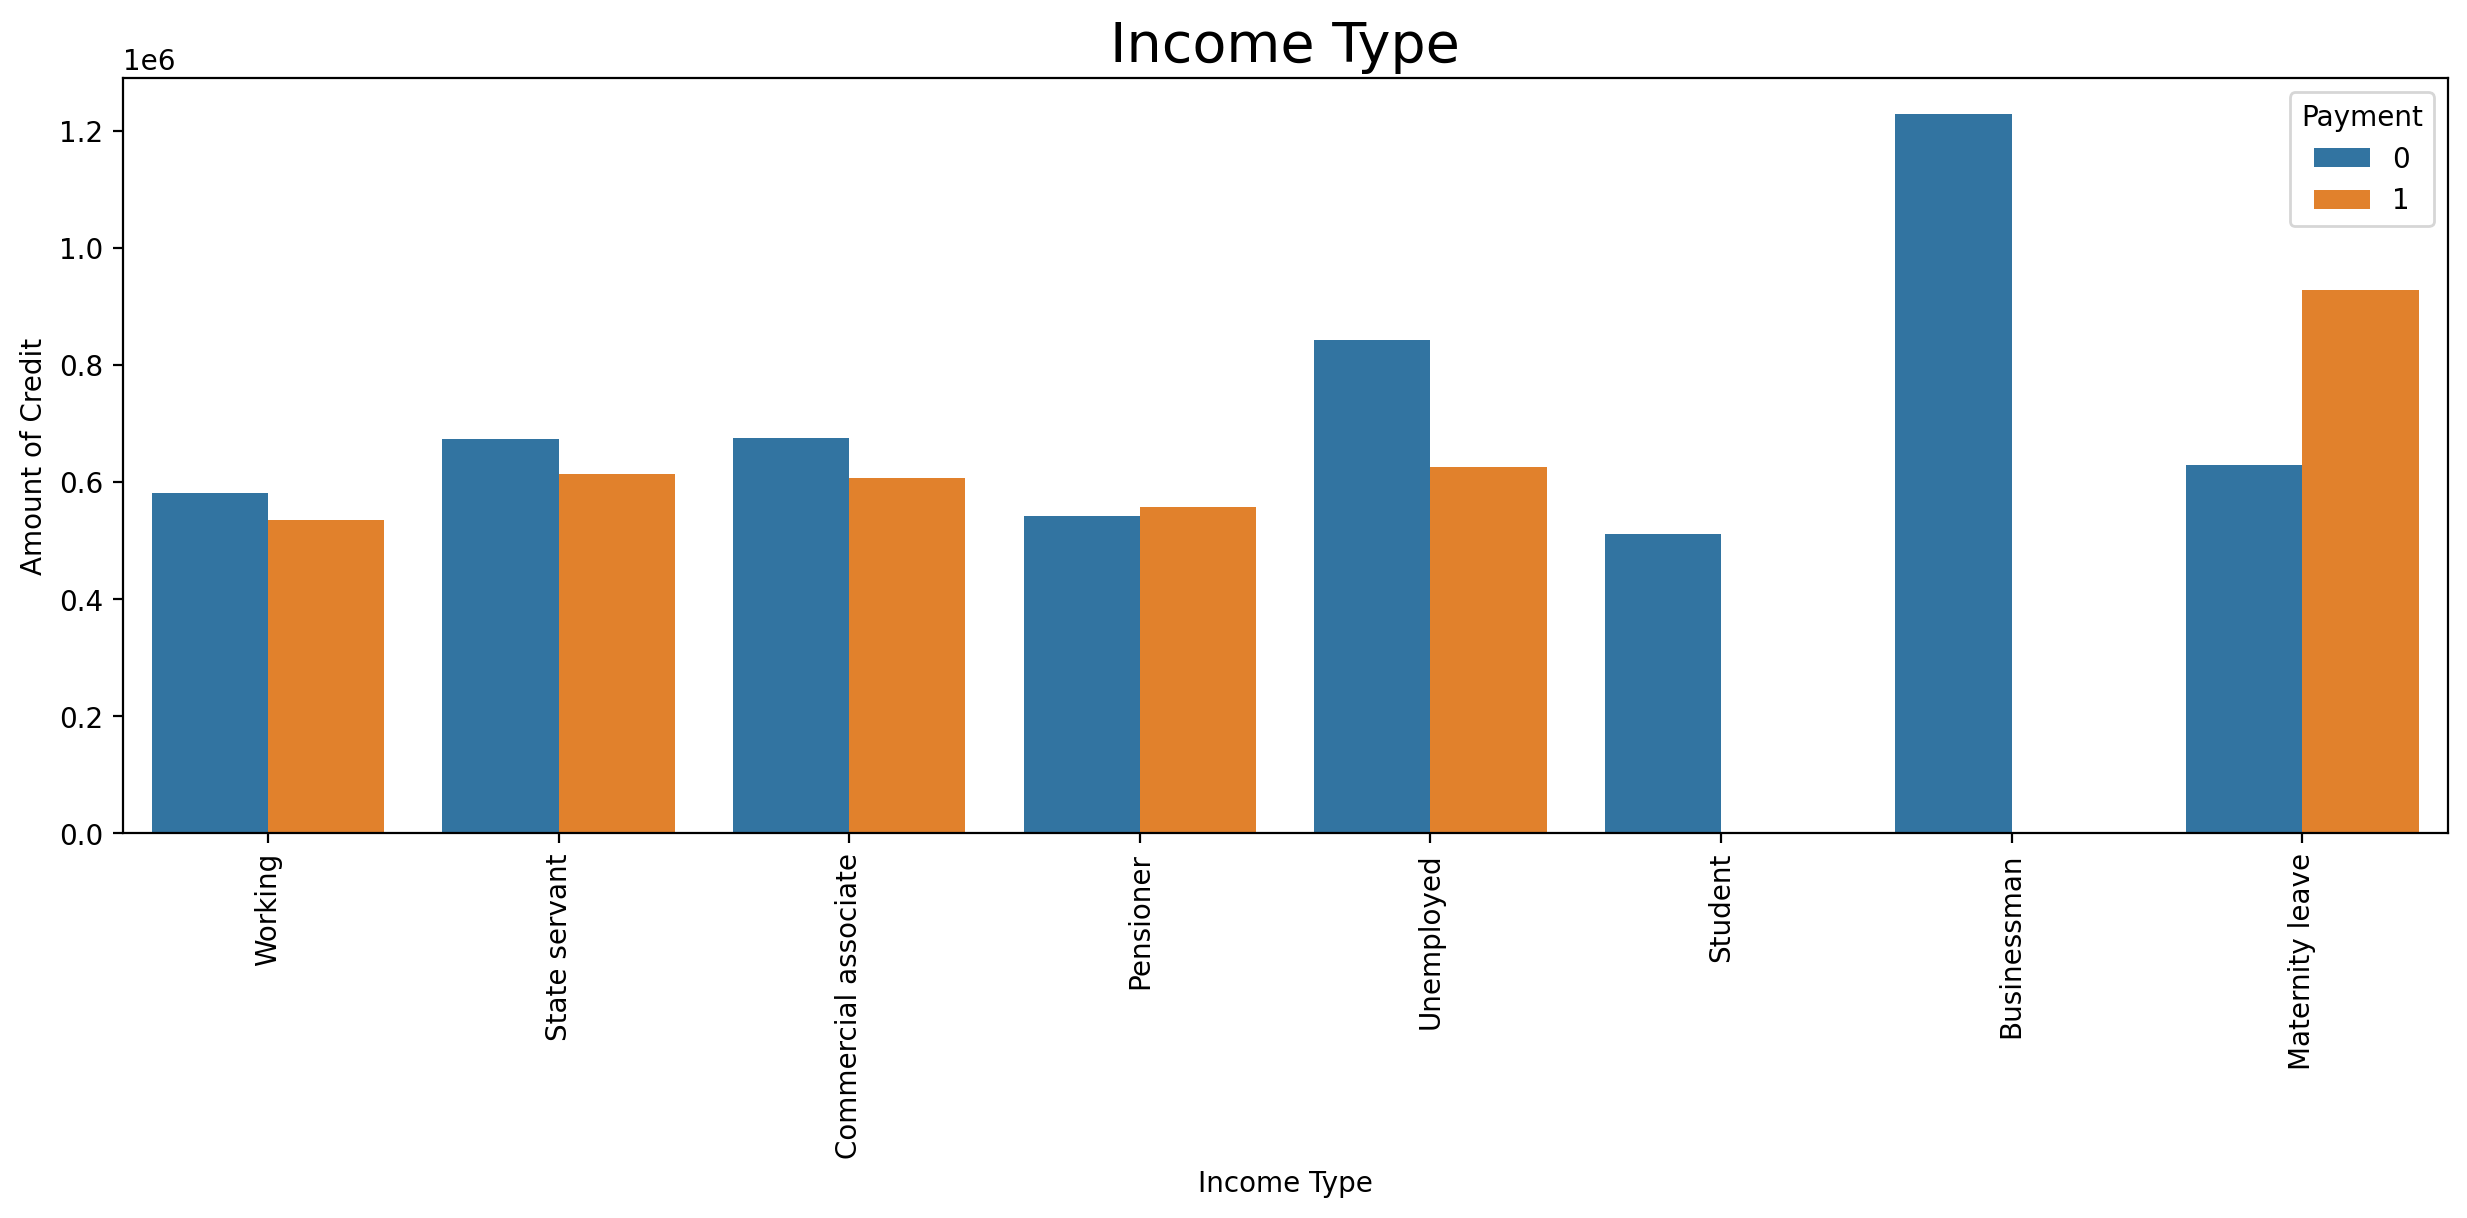

In [527]:
plt.figure(figsize=(15,5),dpi=200)
sns.barplot(x=df['Income Type'],y=df['Amount of Credit'],hue=df['Payment'],data=df,ci=None)
plt.title('Income Type',fontsize=20)
plt.xticks(rotation=90);

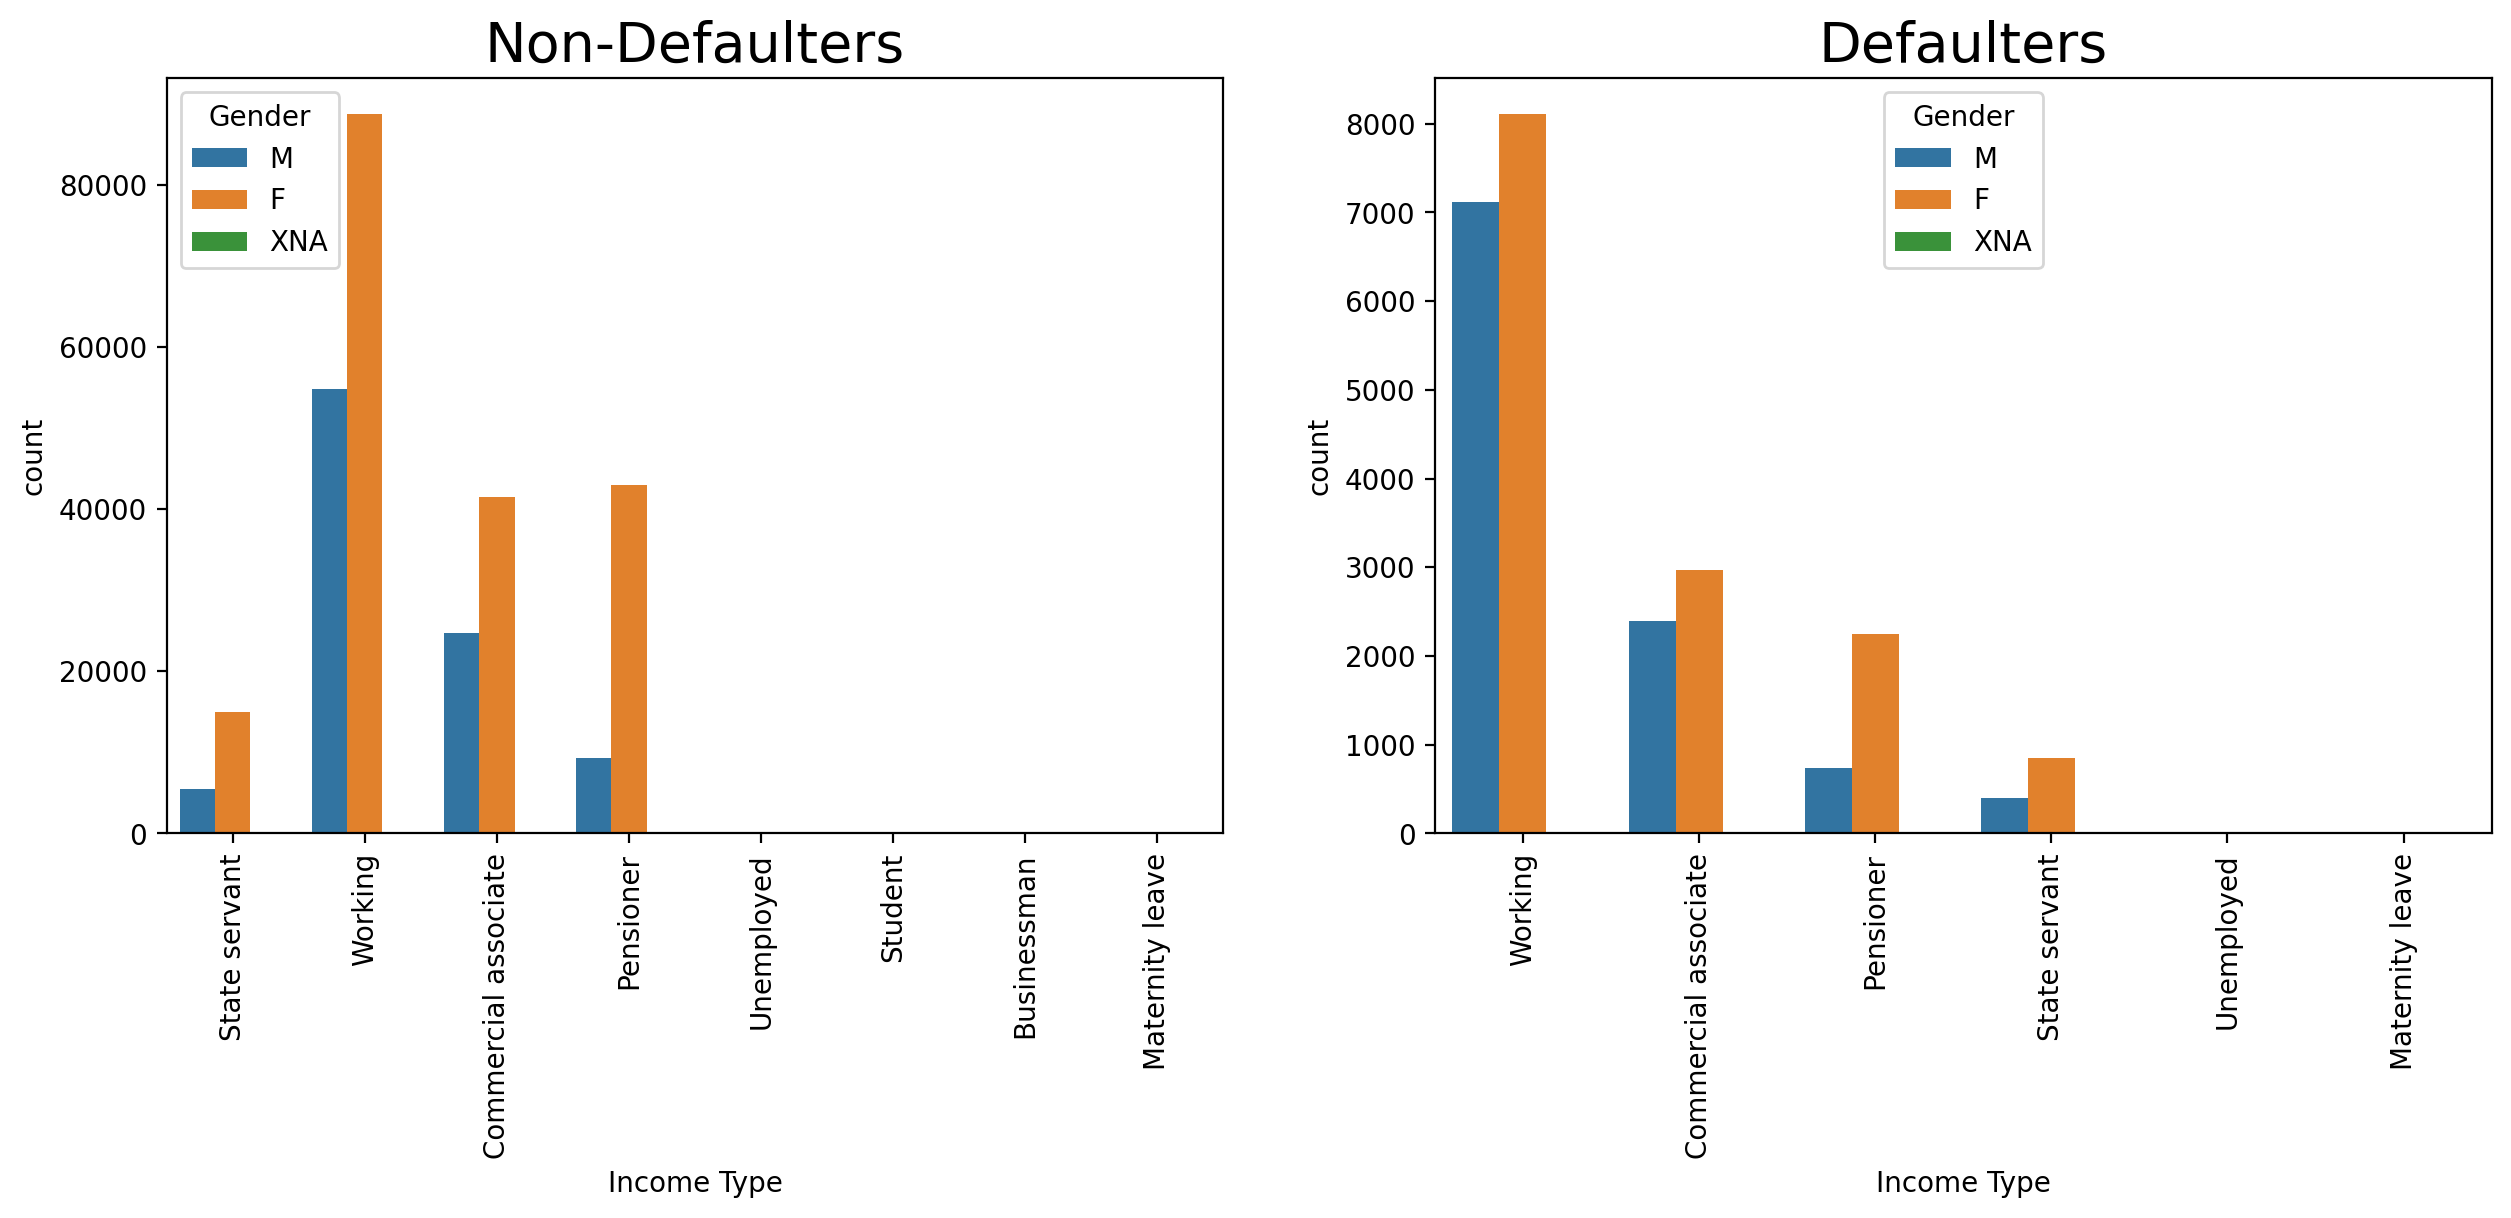

In [520]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
sns.countplot(x=Non_Defaulters['Income Type'],hue=df['Gender'])
plt.title('Non-Defaulters',fontsize=20)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=Defaulters['Income Type'],hue=df['Gender'])
plt.title('Defaulters',fontsize=20)
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Defaulters')

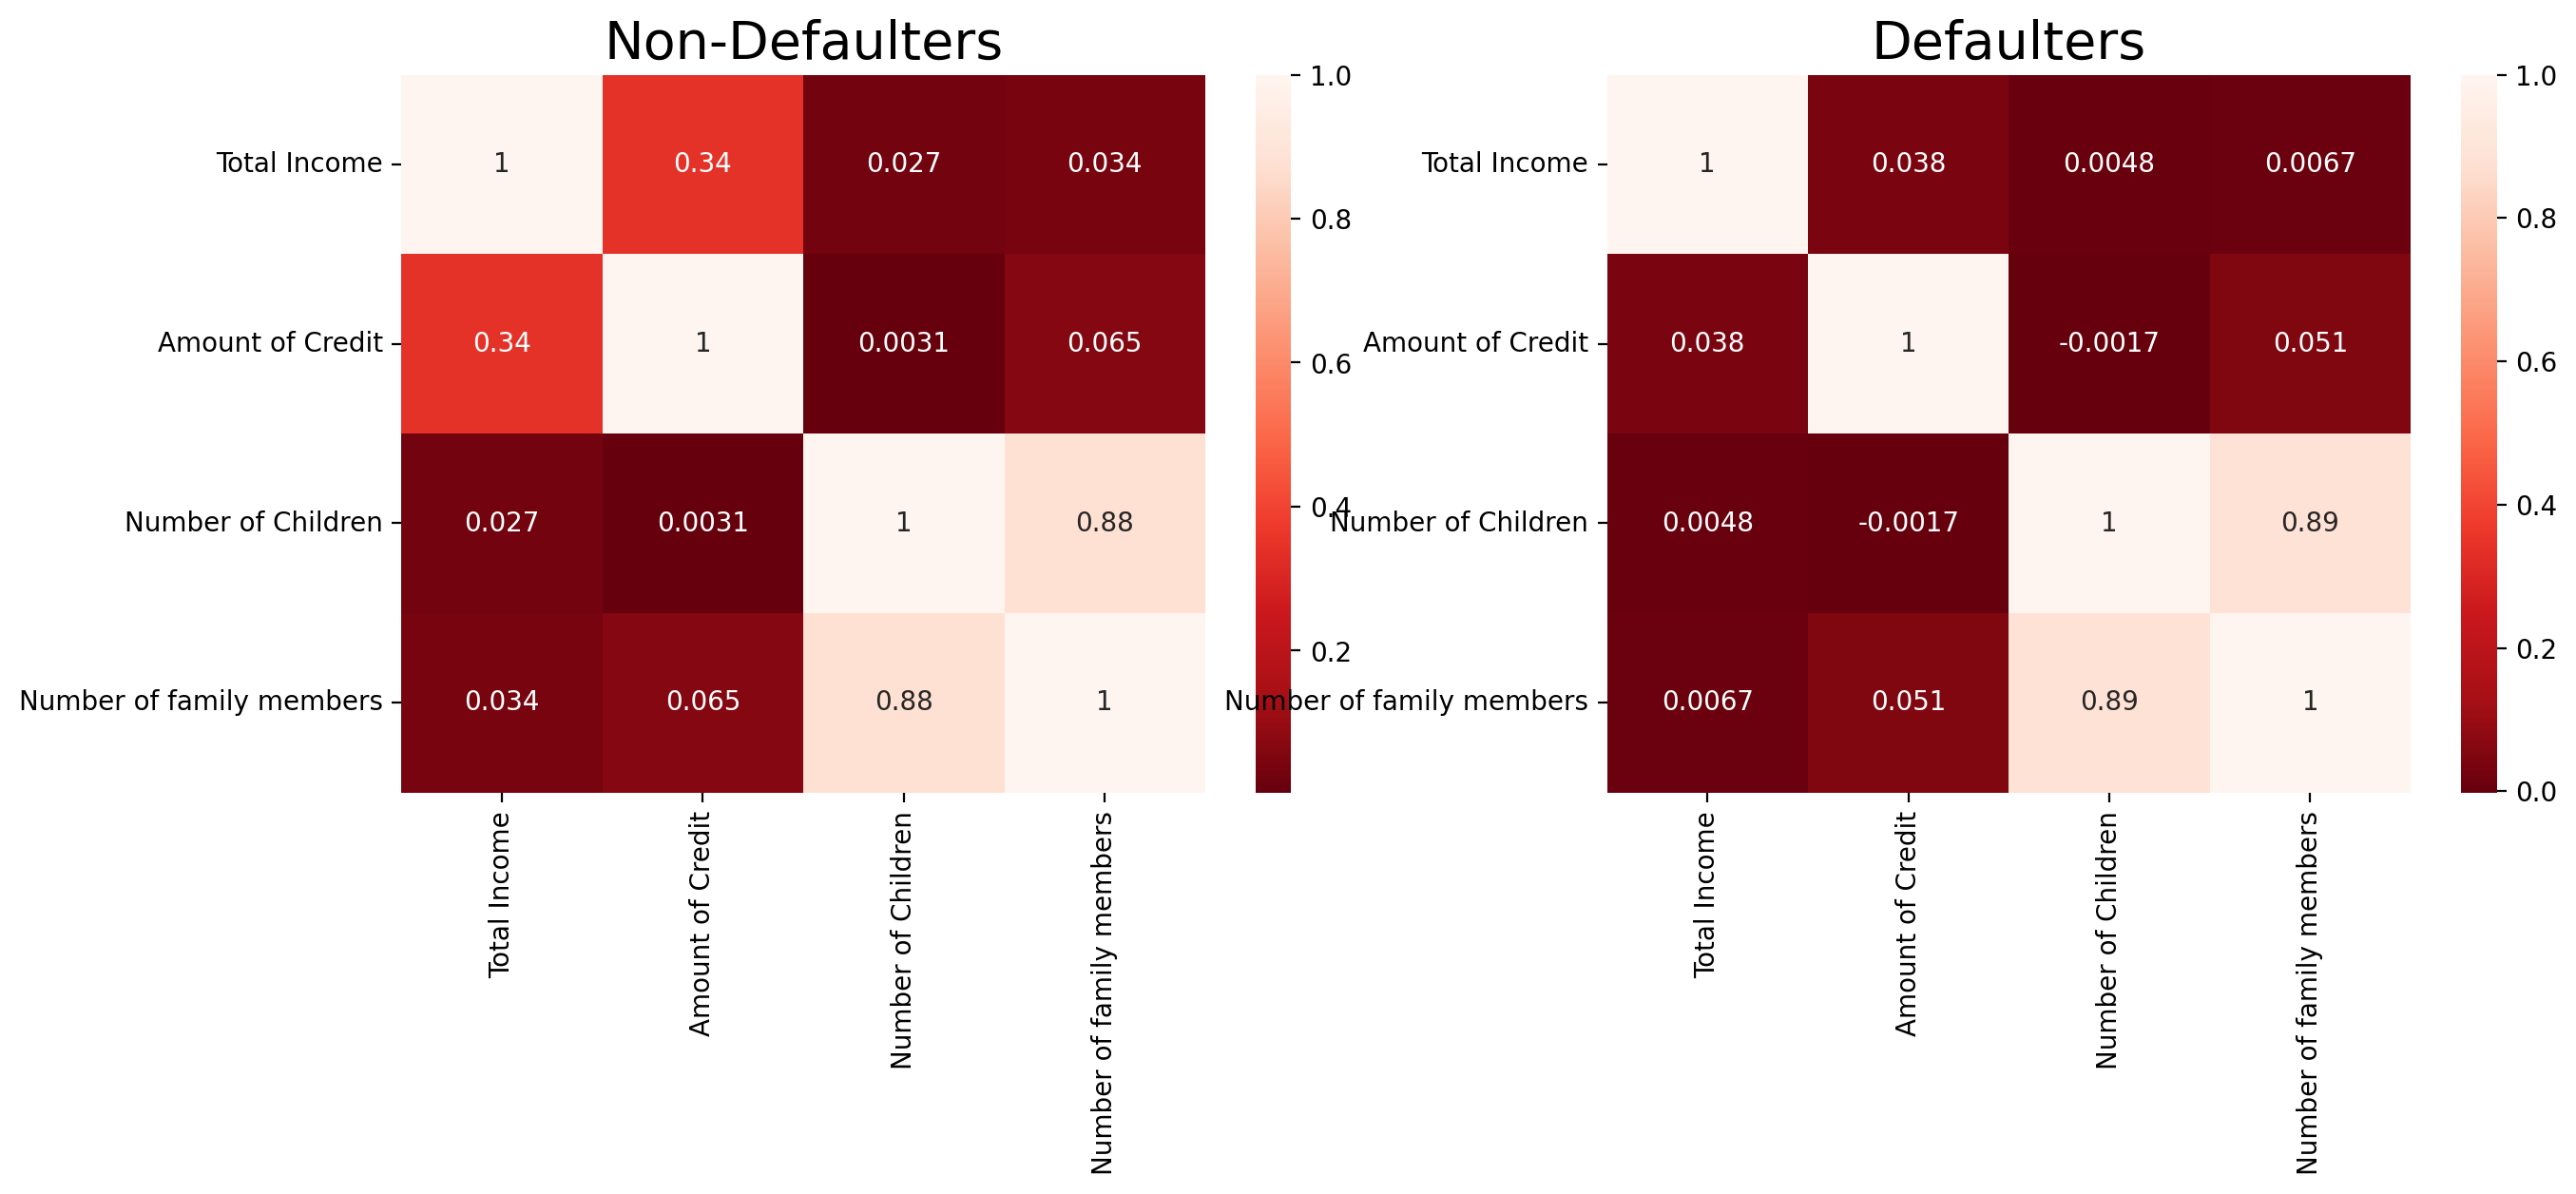

In [526]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(121)
sns.heatmap(Non_Defaulters[['Total Income','Amount of Credit','Number of Children','Number of family members']].corr(),annot=True,cmap='Reds_r')
plt.title('Non-Defaulters',fontsize=20)
plt.subplot(122)
sns.heatmap(Defaulters[['Total Income','Amount of Credit','Number of Children','Number of family members']].corr(),annot=True,cmap='Reds_r')
plt.title('Defaulters',fontsize=20)

<AxesSubplot:xlabel='Profession', ylabel='Income Type'>

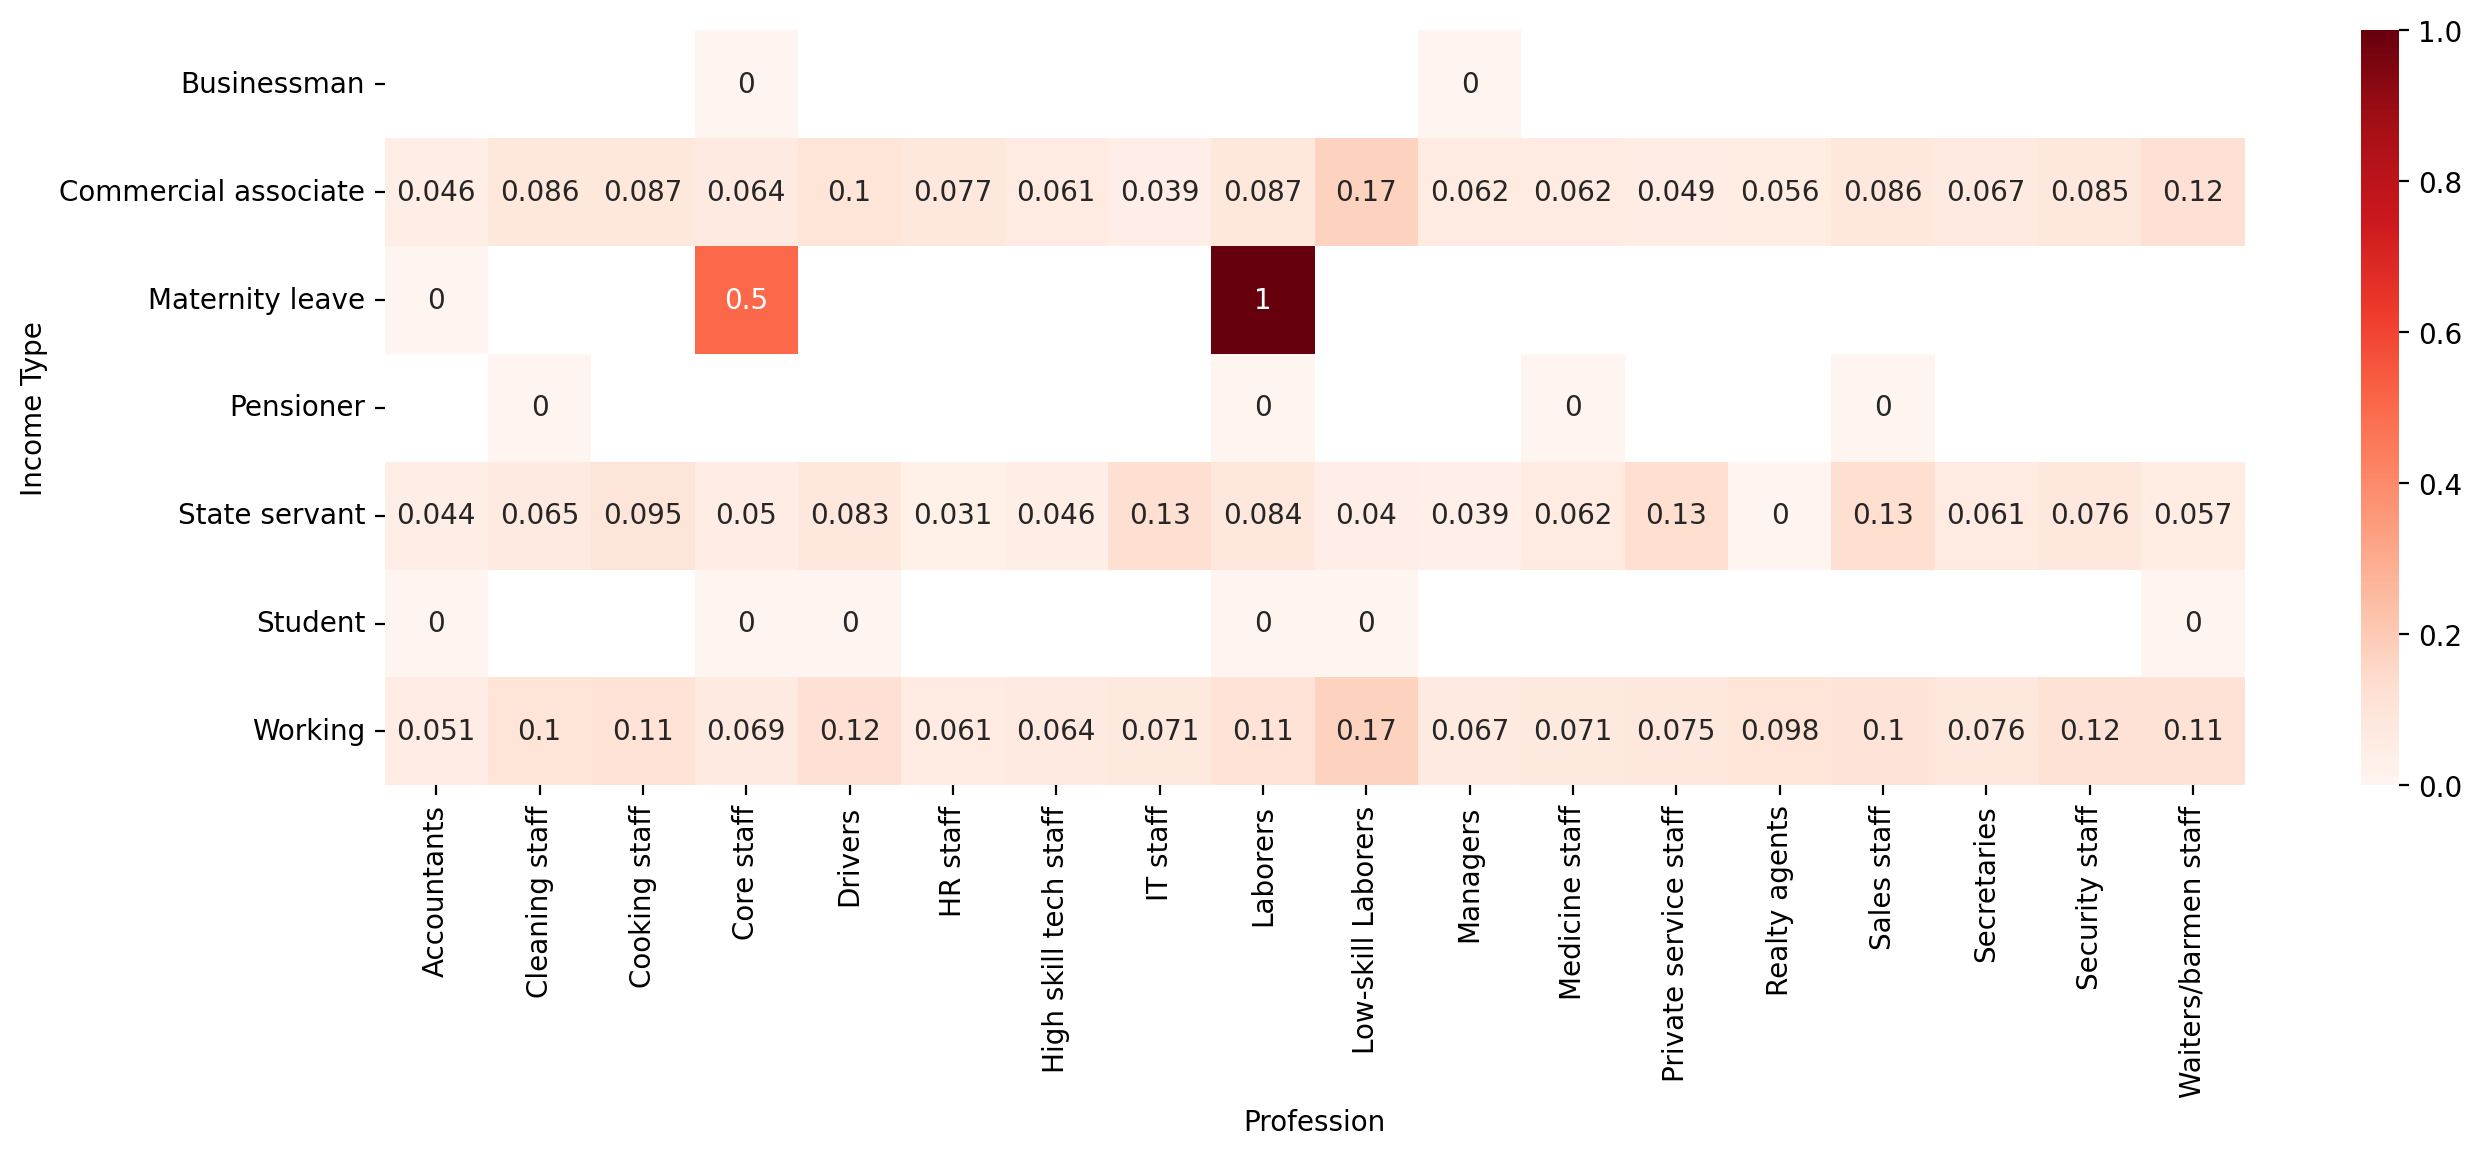

In [484]:
plt.figure(figsize=(15,5),dpi=200)
sns.heatmap(pd.pivot_table(df,values='Payment',index=df['Income Type'],columns = df['Profession']),annot=True,cmap='Reds')

<AxesSubplot:xlabel='Education Type', ylabel='Income Type'>

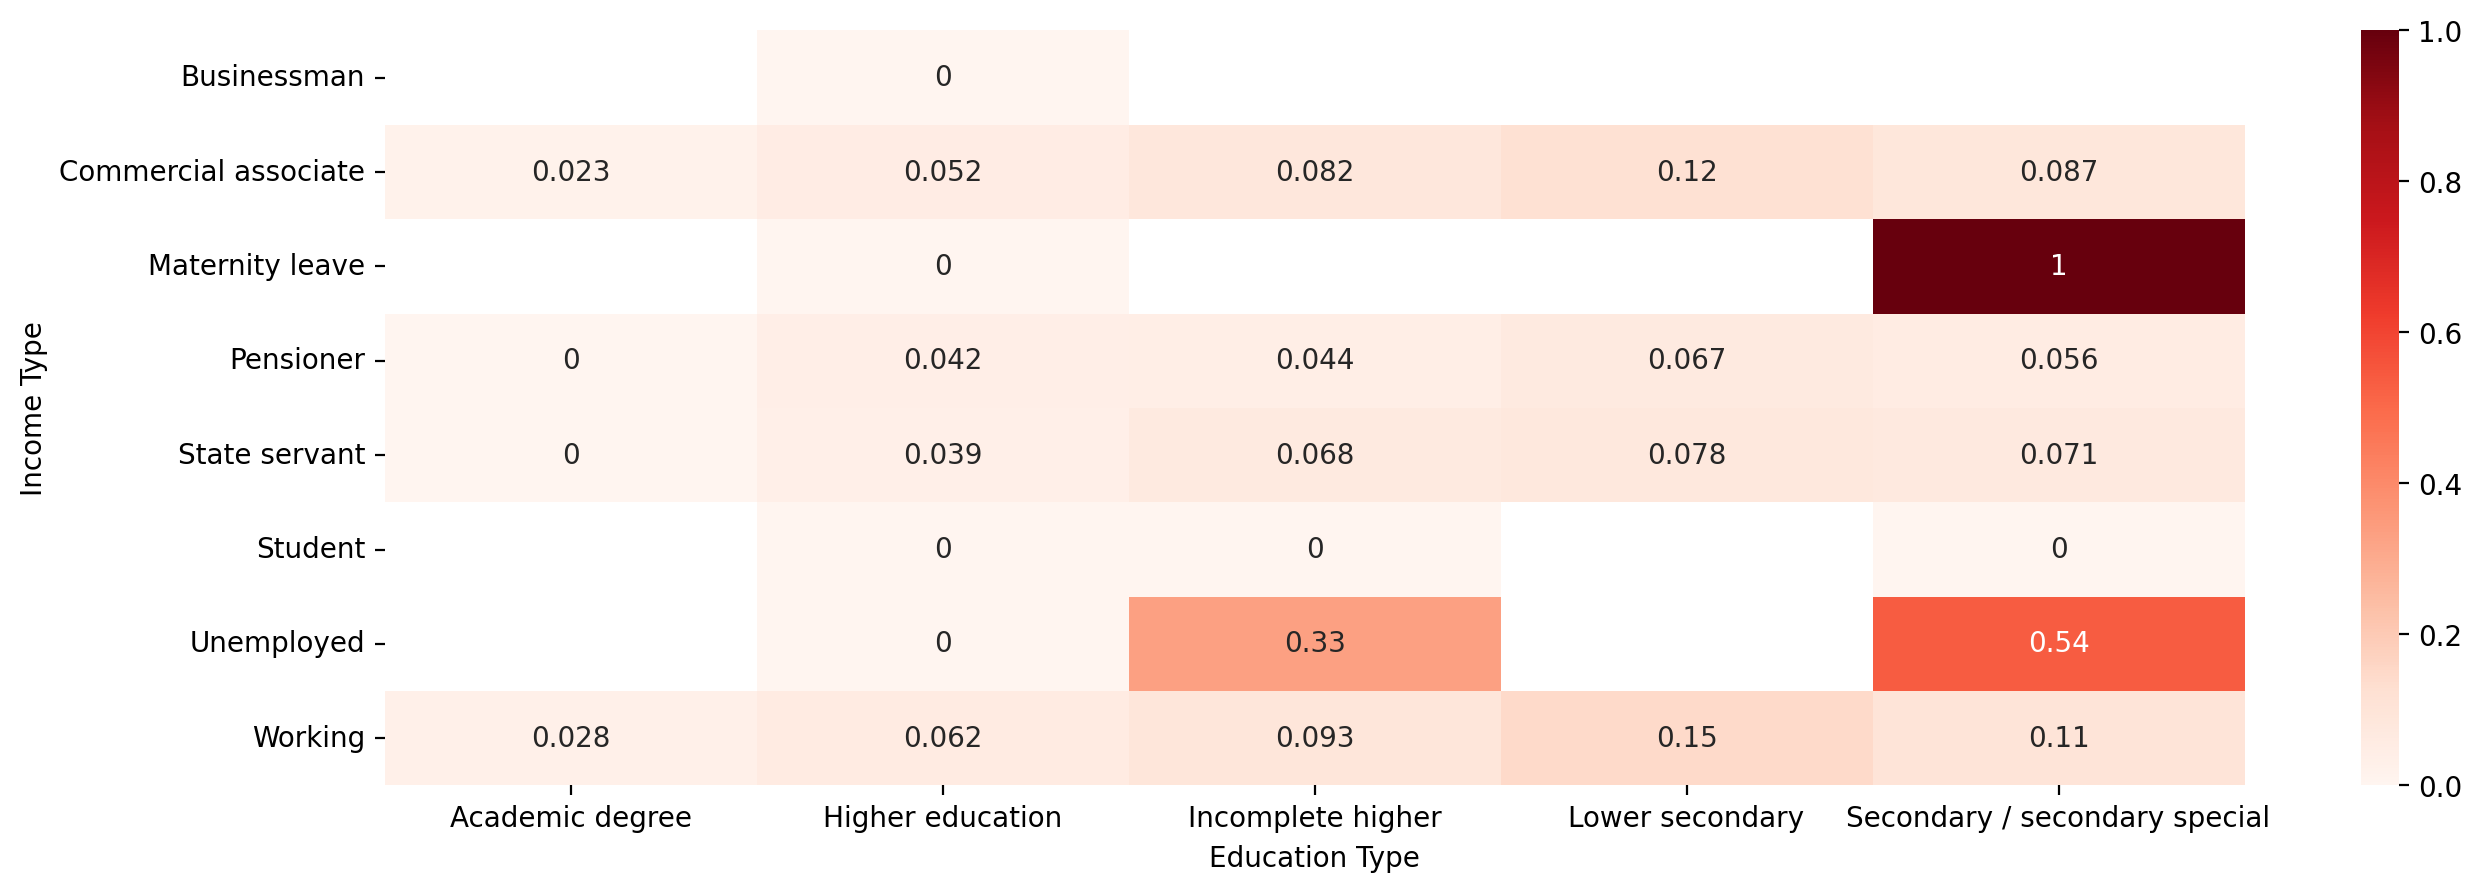

In [485]:
plt.figure(figsize=(15,5),dpi=200)
sns.heatmap(pd.pivot_table(df,values='Payment',index=df['Income Type'],columns = df['Education Type']),annot=True,cmap='Reds')

#### Clients who are Unemployed and have Secondary level education have a high positive correlation
#### Also clients who are unemployed and have incomplete higher education have a positive correlation

# Recommendations to the Bank 
•	Chances for single females who apply for loan applications turning out to be defaulters as compared with single males is higher. We recommend the loan manager to scan their applications carefully.

•	Banks can give away loans to State servant, pensioners and people with higher education degrees, as they are very less likely to default loan payments.

•	We understood that, Labourers, Sales staff, Drivers, cleaning staff, Core staff are more likely to default a payment of the loan.

•	Banks should focus less on income type ‘Working’ as they are having a greater number of unsuccessful payments.

•	Bank should focus less on applicants who are unemployed or on maternity leave.



